In [1]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver as wd
import pandas as pd

driver = wd.Chrome(executable_path = "C:\\Users\\unist\\Anaconda3\\chromedriver\\chromedriver.exe")

#드라이버 &링크 열기
url = "https://programmers.co.kr/"
driver.get(url)

time.sleep(3)

html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

stack_tag = soup.select('ul.job-sort-tags')

stack_list = []
stack_link_list = []

for stack in stack_tag:
    stack_info = stack.select('li a')
    for stack in stack_info:
        stack_list.append(stack.text)
        stack_link = stack.attrs['href']
        stack_link_list.append(stack_link)

print(stack_list)
print(stack_link_list)

['Java', 'Spring', 'Node.js', 'Django', 'ReactJS', 'Vue.js', 'JavaScript', 'Python', 'Kotlin', 'C++', 'Android', 'iOS', '서버/백엔드', '프론트엔드', '웹 풀스택', '안드로이드 앱', '아이폰 앱']
['https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=Java', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=Spring', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=Node.js', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=Django', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=ReactJS', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=Vue.js', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=JavaScript', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=Python', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=Kotlin', 'https://programmers.co.kr/job_positions?job_position%5Btags%5D%5B%5D=C%2B%2B', 'https://programmers.co.kr/job_posit

In [8]:
import requests
import time
from bs4 import BeautifulSoup
from selenium import webdriver as wd
import pandas as pd

In [2]:
'''
#stack별 직업 조사하기
stack_num = len(stack_list)

for i in range(stack_num):
    print(stack_list[i]+'start') 
    driver.get(stack_link_list[i])
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    content_link_num = int(soup.select('#paginate > nav > ul')[0].select('li.page-item')[-2].text)

    #빈 변수생성
    globals()[f'{stack_list[i]}_job']=[]
    
    
    for k in range(1, content_link_num+1):
        
        driver.get(stack_link_list[i]+f'&page={k}')
        
        time.sleep(10)
        
        html = driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
    
        job_list = soup.select('ul.list-positions')
    
        for job in job_list:
            job_info_list = job.select('li div a')
            for job_info in job_info_list:
                job_link = job_info.attrs['href']
                url = 'https://programmers.co.kr/'+job_link
                globals()[f'{stack_list[i]}_job'].append(url)
     
    print(globals()[f'{stack_list[i]}_job'])
    print(stack_list[i]+'end')
    '''

driver.get('https://programmers.co.kr/job')
    
time.sleep(3)

hiring_list = []
    
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')
    
content_link_num = int(soup.select('#paginate > nav > ul')[0].select('li.page-item')[-2].text)

for k in range(1, content_link_num+1):
    driver.get('https://programmers.co.kr/job'+f'?page={k}')
        
    time.sleep(10)
        
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    job_list = soup.select('ul.list-positions')
    
    for job in job_list:
        job_info_list = job.select('li div a')
        for job_info in job_info_list:
            job_link = job_info.attrs['href']
            url = 'https://programmers.co.kr/'+job_link
            hiring_list.append(url)
     
    print(job_link)

/job_positions/3775
/job_positions/3857
/job_positions/3868
/job_positions/3865
/job_positions/2040
/job_positions/3825
/job_positions/3807
/job_positions/3796
/job_positions/3781
/job_positions/2445
/job_positions/3696
/job_positions/1826
/job_positions/782
/job_positions/3447
/job_positions/3386
/job_positions/2299
/job_positions/3273
/job_positions/3223
/job_positions/279
/job_positions/3058
/job_positions/3016
/job_positions/1809
/job_positions/2734
/job_positions/2227
/job_positions/2585
/job_positions/2547
/job_positions/2413
/job_positions/2039
/job_positions/2210
/job_positions/1876
/job_positions/1702
/job_positions/1460
/job_positions/1168
/job_positions/2442


In [3]:
#채용 정보 받아오는 함수
#채용정보-
def get_hiring_info(job_link):
    driver.get(job_link)
    
    time.sleep(10)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    #회사이름/링크/모집글
    try:
        company_name = soup.find('div', class_="header-body col-item col-xs-12 col-sm-12 col-md-12 col-lg-8").find('h4').text
    except:
        company_name = 'null'
        
    try:
        company_link = soup.select('body > div.main > div.position-show > div > div > div.content-side.col-item.col-xs-12.col-sm-12.col-md-12.col-lg-4 > section:nth-child(2) > ul > li:nth-child(1) > h6.list-value > a')[0].attrs['href']
    except:
        company_link = 'null'

    #페이지 전체 정보
    try:
        main_content = soup.select('body > div.main > div.position-show > div > div > div.content-body.col-item.col-xs-12.col-sm-12.col-md-12.col-lg-8')[0]
    except:
        main_content = 'null'
    #요약된 정보 받아오기

    try:
        short_info = main_content.find('section', class_ = 'section-summary')
    
        summ = short_info.find('h5', class_ = 'section-title').text
        
        short_info_label = short_info.find_all('td', class_ = 't-label')
        short_info_content = short_info.find_all('td', class_ = 't-content')
    
        label_num = len(short_info_label)
    
        for i in range(label_num):
            short_info_label[i] = short_info_label[i].text
            short_info_content[i] = short_info_content[i].text
        
        short_content = dict(zip(short_info_label, short_info_content))
        
    except:
        short_info = 'null'
        summ = 'null'
        short_info_label = 'null'
        short_info_content = 'nul'
        label_num= 'null'
        short_content = 'null'
    
    #기술 스택 받아오기
    try:
        stack = main_content.find('section', class_ = 'section-stacks').text
        
        stack_info_list = main_content.find('tr', class_ = 'heavy-use')
        stack_info = stack_info_list.select('td code')
    
        for i in range(len(stack_info)):
            stack_info[i] = stack_info[i].text  
        
    except:
        stack_info = 'null'
    
    #업무
    try:
        work = main_content.find('section', class_ = 'section-position')
    
        work_list = work.find('div', class_ = 'markdown github')
        work_todo = work_list.text
    except:
        work_todo = 'null'
    
    #자격 조건
    try:
        req = main_content.find('section', class_ = 'section-requirements')
    
        req_list = req.find('div', class_ = 'markdown github')
        requirement = req_list.text
        
    except:
        requirement = 'null'
    
    #우대 사항
    try:
        s_prefer = main_content.find('section', class_ = 'section-preference')
    
        s_prefer_list = s_prefer.find('div', class_ = 'markdown github')
        preference = s_prefer_list.text
        
    except:
        preference = 'null'
        
    #회사 설명
    try:
        w_des = main_content.find('section', class_ = 'section-description')
        w_des_info = w_des.text
        
    except:
        w_des_info = 'null'
        
    #회사 환경
    try:
        w_env = main_content.find('section', 'section-culture')
        w_env_info = w_env.text
        
    except:
        w_env_info = 'null'
    
    #정보 저장하기
    company_data = {'company_name': company_name, 'company_link': company_link,'company_summary': short_content,'stack': stack_info,'requirement': requirement,'preference': preference, 'description': w_des_info, 'culture': w_env_info}
    
    return company_data

In [6]:
#기술 스택별
data = {}
hire_info = []
i=0

for link in hiring_list:
    job_info = get_hiring_info(link)
    hire_info.append(job_info)
    i+=1

    print(job_info['company_name'], job_info['company_summary'], i)

오이스터 에이블 {'직무': '서버/백엔드, 프론트엔드, 사물인터넷(IoT)', '경력': '경력 무관', '연봉': '3000 ~ 6000 만원', '회사 규모': '1-10명', '주요 서비스': '\nIoT 분리수거 솔루션 오늘의 분리수거\n', '기간': '상시 채용', '위치': '서울시 용산구 청파로 109 서울시글로벌스타트업센터'} 1
슈가힐 {'직무': '데이터 엔지니어', '경력': '3 ~ 7년', '연봉': '5000 ~ 10000 만원', '회사 규모': '92명', '주요 서비스': '\n인터넷상품중개, 부동산정보제공서비스\n', '기간': '2020-12-07 20:45 부터 2021-01-10 20:45 까지', '위치': '서울 강남구 강남대로 408, (역삼동) '} 2
슈가힐 {'직무': '데이터 엔지니어', '경력': '3 ~ 7년', '연봉': '5000 ~ 10000 만원', '회사 규모': '92명', '주요 서비스': '\n인터넷상품중개, 부동산정보제공서비스\n', '기간': '2020-12-07 20:36 부터 2021-01-10 20:44 까지', '위치': '서울 강남구 강남대로 408, (역삼동) '} 3
슈가힐 {'직무': '아이폰 앱', '경력': '3 ~ 7년', '연봉': '5000 ~ 10000 만원', '회사 규모': '92명', '주요 서비스': '\n인터넷상품중개, 부동산정보제공서비스\n', '기간': '2020-12-07 20:29 부터 2021-01-10 20:33 까지', '위치': '서울 강남구 강남대로 408, (역삼동) '} 4
슈가힐 {'직무': '서버/백엔드', '경력': '3 ~ 7년', '연봉': '5000 ~ 10000 만원', '회사 규모': '92명', '주요 서비스': '\n인터넷상품중개, 부동산정보제공서비스\n', '기간': '2020-12-07 20:22 부터 2021-01-10 20:23 까지', '위치': '서울 강남구 강남대로 408, (역삼동) '} 5
테스트웍스

제네시스랩 {'직무': '서버/백엔드, 인공지능(AI)', '경력': '3 ~ 10년', '연봉': '4000 ~ 10000 만원', '회사 규모': '13명', '주요 서비스': '\n전문연구개발업\n', '기간': '상시 채용', '위치': '서울 중구 삼일대로 343, (저동1가) WeWork 16층'} 49
제네시스랩 {'직무': '프론트엔드, 인공지능(AI)', '경력': '3 ~ 10년', '연봉': '4000 ~ 10000 만원', '회사 규모': '13명', '주요 서비스': '\n전문연구개발업\n', '기간': '상시 채용', '위치': '서울 중구 삼일대로 343, (저동1가) WeWork 16층'} 50
에이비씨스튜디오 {'직무': '프론트엔드, 안드로이드 앱, 아이폰 앱', '경력': '2 ~ 10년', '연봉': '4000 ~ 6000 만원', '회사 규모': '11-50명', '주요 서비스': '\n베트남 스타일 콘텐츠 커머스\n', '기간': '2020-11-28 18:29 부터 2020-12-15 18:30 까지', '위치': '서울 강남구 영동대로85길 34, 스파크플러스 삼성2호점 801호'} 51
AB180 {'직무': '서버/백엔드', '경력': '2 ~ 10년', '연봉': '3000 ~ 6000 만원', '회사 규모': '53명', '주요 서비스': '\n에어브릿지\n', '기간': '상시 채용', '위치': '서울 서초구 방배천로2길 10 JBI빌딩 5층'} 52
워드바이스 {'직무': '서버/백엔드, 프론트엔드, 웹 풀스택', '경력': '3 ~ 10년', '연봉': '4000 ~ 7000 만원', '회사 규모': '14명', '주요 서비스': '\n영문교정, 번역, 인공지능 영어교정 서비스\n', '기간': '상시 채용', '위치': '서울 강남구 테헤란로 205, (역삼동) , 205 빌딩, 10층 워드바이스 (역삼역 1분 거리)'} 53
보이저엑스 {'직무': '서버/백엔드, 프론트엔드, 인공지능(AI)', '경

와이브레인 {'직무': '프론트엔드, 안드로이드 앱', '경력': '신입', '회사 규모': '28명', '주요 서비스': '\n우울증치료기기, 두통치료기기, 명상/스트레스관리 \n', '기간': '2020-11-09 11:41 부터 2020-12-31 11:41 까지', '위치': '경기 성남시 수정구 창업로 54, (시흥동) '} 96
이지스토리지 {'직무': '서버/백엔드, 프론트엔드, 웹 풀스택', '경력': '1 ~ 3년', '회사 규모': '40명', '주요 서비스': '\n          ezstorage\n      ', '기간': '상시 채용', '위치': '서울 강남구 테헤란로55길 27, (역삼동) 예림빌등 301호'} 97
키메디 {'경력': '3 ~ 15년', '연봉': '3000 ~ 5500 만원', '회사 규모': '40명', '주요 서비스': '\n          의료/제약/헬스케어 플랫폼 서비스\n      ', '기간': '상시 채용', '위치': '서울시 강남구 논현로 416, 6층(역삼동, 운기빌딩)'} 98
iPortfolio {'직무': '서버/백엔드, 프론트엔드, 웹 풀스택', '경력': '경력 무관', '회사 규모': '46명', '주요 서비스': '\nREADING &\n', '기간': '상시 채용', '위치': '서울 중구 남대문로 9길 24 1102호'} 99
iPortfolio {'직무': '안드로이드 앱, 응용 프로그램', '경력': '경력 무관', '회사 규모': '46명', '주요 서비스': '\nREADING &\n', '기간': '상시 채용', '위치': '서울 중구 남대문로 9길 24 1102호'} 100
티온미디어 {'직무': '아이폰 앱, 시스템 소프트웨어', '경력': '3 ~ 5년', '회사 규모': '14명', '주요 서비스': '\n          응용 소프트웨어 개발 및 공급업\n      ', '기간': '2020-11-30 16:16 부터 2020-12-31 18:00 까지', 

바닐라브릿지 {'직무': '프론트엔드, 웹 풀스택', '경력': '3 ~ 10년', '연봉': '3500 ~ 6000 만원', '회사 규모': '13명', '주요 서비스': '\n리워드 기반 매치메이킹 플랫폼\n', '기간': '2020-11-25 17:43 부터 2020-12-31 17:43 까지', '위치': '서울 강남구 테헤란로19길 14, (역삼동) , 4층'} 146
바닐라브릿지 {'직무': '서버/백엔드, 웹 풀스택', '경력': '3 ~ 10년', '연봉': '3500 ~ 8000 만원', '회사 규모': '13명', '주요 서비스': '\n리워드 기반 매치메이킹 플랫폼\n', '기간': '2020-11-25 12:14 부터 2020-12-31 12:15 까지', '위치': '서울 강남구 테헤란로19길 14, (역삼동) , 4층'} 147
콘텐츠퍼스트(태피툰) {'직무': '서버/백엔드, 머신러닝, 데이터 엔지니어', '경력': '2 ~ 10년', '회사 규모': '39명', '주요 서비스': '\nTappytoon(태피툰)\n', '기간': '상시 채용', '위치': '서울 강남구 테헤란로 211, (역삼동) 6층'} 148
콘텐츠퍼스트(태피툰) {'직무': '서버/백엔드, 시스템/네트워크, 시스템 소프트웨어', '경력': '2 ~ 10년', '회사 규모': '39명', '주요 서비스': '\nTappytoon(태피툰)\n', '기간': '상시 채용', '위치': '서울 강남구 테헤란로 211, (역삼동) 6층'} 149
콘텐츠퍼스트(태피툰) {'직무': '서버/백엔드, 안드로이드 앱, 아이폰 앱', '경력': '5 ~ 10년', '회사 규모': '39명', '주요 서비스': '\nTappytoon(태피툰)\n', '기간': '상시 채용', '위치': '서울 강남구 테헤란로 211, (역삼동) 6층'} 150
콘텐츠퍼스트(태피툰) {'직무': '프론트엔드, 안드로이드 앱, 아이폰 앱', '경력': '3 ~ 10년', '회사 규모': '39명',

세나클소프트 {'직무': '서버/백엔드, 웹 풀스택, 응용 프로그램', '경력': '3 ~ 15년', '연봉': '3000 ~ 10000 만원', '회사 규모': '26명', '주요 서비스': '\n          헬스케어\n      ', '기간': '상시 채용', '위치': '서울시 강남구 테헤란로 431, 11층'} 200
머지리티 {'직무': '웹 풀스택, 아이폰 앱, 시스템 소프트웨어', '경력': '경력 무관', '회사 규모': '13명', '주요 서비스': '\n㈜머지리티\n', '기간': '상시 채용', '위치': '06052 서울 강남구 학동로'} 201
머지리티 {'직무': '머신러닝, 인공지능(AI), 시스템/네트워크', '경력': '경력 무관', '회사 규모': '13명', '주요 서비스': '\n㈜머지리티\n', '기간': '상시 채용', '위치': '06052 서울 강남구 학동로'} 202
머지리티 {'직무': '인공지능(AI), 응용 프로그램, 블록체인', '경력': '경력 무관', '회사 규모': '13명', '주요 서비스': '\n㈜머지리티\n', '기간': '상시 채용', '위치': '06052 서울 강남구 학동로'} 203
에스티유니타스(ST Unitas) {'직무': '서버/백엔드, 프론트엔드, 웹 풀스택', '경력': '3 ~ 5년', '회사 규모': '710명', '주요 서비스': '\n공단기, 영단기, 커넥츠 \n', '기간': '상시 채용', '위치': '서울 강남구 영동대로 417, (대치동) 3층'} 204
에스티유니타스(ST Unitas) {'직무': '서버/백엔드, 프론트엔드, 웹 풀스택', '경력': '5 ~ 7년', '회사 규모': '710명', '주요 서비스': '\n공단기, 영단기, 커넥츠 \n', '기간': '상시 채용', '위치': '서울 강남구 영동대로 417, (대치동) 3층'} 205
딜리버리히어로 코리아 (Delivery Hero Korea) {'직무': '프론트엔드, 응용 프로그램', '경

인플루엔셜 {'직무': '서버/백엔드, 웹 풀스택, 시스템/네트워크', '경력': '2 ~ 12년', '회사 규모': '62명', '기간': '상시 채용', '위치': '서울 강남구 도산대로 156, (논현동) '} 253
카카오엔터프라이즈 {'직무': '서버/백엔드, 데이터 엔지니어, 시스템 소프트웨어', '경력': '경력 무관', '회사 규모': '794명', '주요 서비스': '\nAI Technology B2B\n', '기간': '2020-10-27 19:02 부터 2020-12-31 23:59 까지', '위치': '경기도 성남시 분당구 판교역로 235, N동 3층'} 254
에이블리코퍼레이션 {'직무': '프론트엔드, 웹 풀스택', '경력': '2 ~ 6년', '회사 규모': '114명', '주요 서비스': '\n에이블리\n', '기간': '상시 채용', '위치': '서울시 강남구 테헤란로 44길 8, 아이콘 역삼빌딩 4층'} 255
이제이엔 {'직무': '프론트엔드', '경력': '2 ~ 10년', '회사 규모': '28명', '주요 서비스': '\n트윕, 트게더, 배틀독\n', '기간': '상시 채용', '위치': '서울시 강남구 테헤란로 447 KB우준타워 9층'} 256
브레인커머스 {'직무': '아이폰 앱', '경력': '5 ~ 10년', '회사 규모': '71명', '주요 서비스': '\n잡플래닛\n', '기간': '상시 채용', '위치': '서울 강남구 테헤란로 415, (삼성동) 스파크플러스 3F'} 257
브레인커머스 {'직무': '안드로이드 앱', '경력': '5 ~ 10년', '회사 규모': '71명', '주요 서비스': '\n잡플래닛\n', '기간': '상시 채용', '위치': '서울 강남구 테헤란로 415, (삼성동) 스파크플러스 3F'} 258
딜리버리히어로 코리아 (Delivery Hero Korea) {'직무': 'QA', '경력': '3 ~ 12년', '회사 규모': '801명', '기간': '상시 채용', '위치': '

피어테크(Peertec) {'직무': '서버/백엔드, 블록체인', '경력': '경력 무관', '연봉': '3000 ~ 10000 만원', '회사 규모': '18명', '주요 서비스': '\nGDAC, PeerPay, GROW\n', '기간': '상시 채용', '위치': '서울 강남구 봉은사로 112길 6, (삼성동, 익성빌딩)'} 310
피어테크(Peertec) {'직무': '서버/백엔드, 블록체인', '경력': '경력 무관', '연봉': '3000 ~ 10000 만원', '회사 규모': '18명', '주요 서비스': '\nGDAC, PeerPay, GROW\n', '기간': '상시 채용', '위치': '서울 강남구 봉은사로 112길 6, (삼성동, 익성빌딩)'} 311
자란다 {'직무': '웹 풀스택', '경력': '경력 무관', '회사 규모': '35명', '주요 서비스': '\n(주)자란다\n', '기간': '상시 채용', '위치': '서울 마포구 마포대로 122, (공덕동) 프론트원 14층'} 312
이제이엔 {'직무': '서버/백엔드, 웹 풀스택', '경력': '3 ~ 10년', '연봉': '4000 ~ 8000 만원', '회사 규모': '28명', '주요 서비스': '\n트윕, 트게더, 배틀독\n', '기간': '상시 채용', '위치': '서울시 강남구 테헤란로 447 KB우준타워 9층'} 313
이제이엔 {'직무': '서버/백엔드, 웹 풀스택', '경력': '3 ~ 15년', '회사 규모': '28명', '주요 서비스': '\n트윕, 트게더, 배틀독\n', '기간': '상시 채용', '위치': '서울시 강남구 테헤란로 447 KB우준타워 9층'} 314
비욘드아이앤씨 {'직무': '서버/백엔드, 안드로이드 앱, 응용 프로그램', '경력': '3 ~ 20년', '회사 규모': '13명', '주요 서비스': '\n          O2O 중계 및 물류 플랫폼 서비스\n      ', '기간': '상시 채용', '위치': '서울 성동구 자동차시장1길 4

위지윅스튜디오 {'직무': '인공지능(AI), 게임 클라이언트, 응용 프로그램', '경력': '3 ~ 20년', '연봉': '3000 ~ 7000 만원', '회사 규모': '114명', '주요 서비스': '\n          영상기술 제작 및 영상 기획/제작 서비스\n      ', '기간': '상시 채용', '위치': '서울특별시 강남구 신사동 언주로170길 20'} 360
클로버추얼패션 {'직무': '서버/백엔드, 웹 풀스택', '경력': '5 ~ 12년', '회사 규모': '106명', '주요 서비스': '\n          CLO, Mavelous Desinger, CLOSET, Benefit by CLO\n      ', '기간': '상시 채용', '위치': '서울 강남구 도산대로8길 17-4, (논현동) '} 361
클로버추얼패션 {'직무': '서버/백엔드, 프론트엔드, 시스템 소프트웨어', '경력': '경력 무관', '회사 규모': '106명', '주요 서비스': '\n          CLO, Mavelous Desinger, CLOSET, Benefit by CLO\n      ', '기간': '상시 채용', '위치': '서울 강남구 도산대로8길 17-4, (논현동) '} 362
파수 {'직무': '프론트엔드, 웹 풀스택', '경력': '5 ~ 20년', '연봉': '4000 ~ 8000 만원', '회사 규모': '227명', '주요 서비스': '\nDRM, SPARROW, Wrapsody, ADID\n', '기간': '상시 채용', '위치': '서울특별시 마포구 월드컵북로 396 누리꿈스퀘어 비즈니스타워 17층'} 363
바텍 네트웍스 {'직무': '서버/백엔드, 프론트엔드, 웹 풀스택', '경력': '경력 무관', '회사 규모': '62명', '기간': '상시 채용', '위치': '경기 화성시 삼성1로2길 13, (석우동) 바텍 네트웍스 본사'} 364
본그룹 {'직무': '서버/백엔드, 데이터 엔지니어, 시스템/네트워크', '경력': 

클래스101 {'직무': '서버/백엔드', '경력': '3 ~ 10년', '회사 규모': '230명', '주요 서비스': '\n클래스101\n', '기간': '상시 채용', '위치': '서울특별시 중구 한강대로 416 서울스퀘어 13층'} 415
클래스101 {'직무': '안드로이드 앱, 아이폰 앱', '경력': '2 ~ 8년', '회사 규모': '230명', '주요 서비스': '\n클래스101\n', '기간': '상시 채용', '위치': '서울특별시 중구 한강대로 416 서울스퀘어 13층'} 416
필리스 {'직무': '서버/백엔드, 안드로이드 앱, 아이폰 앱', '경력': '3 ~ 20년', '회사 규모': '19명', '주요 서비스': '\n          서비스\n      ', '기간': '상시 채용', '위치': '대전 서구 갈마중로 34, (갈마동) '} 417
맘편한세상 {'직무': '서버/백엔드', '경력': '1 ~ 3년', '회사 규모': '15명', '주요 서비스': '\n맘시터\n', '기간': '상시 채용', '위치': '서울시 마포구 백범로 130 뉴한일빌딩 3층 맘시터'} 418
맘편한세상 {'직무': '프론트엔드', '경력': '2 ~ 10년', '회사 규모': '15명', '주요 서비스': '\n맘시터\n', '기간': '상시 채용', '위치': '서울시 마포구 백범로 130 뉴한일빌딩 3층 맘시터'} 419
맘편한세상 {'직무': '프론트엔드, 안드로이드 앱, 아이폰 앱', '경력': '2 ~ 10년', '회사 규모': '15명', '주요 서비스': '\n맘시터\n', '기간': '상시 채용', '위치': '서울시 마포구 백범로 130 뉴한일빌딩 3층 맘시터'} 420
맘편한세상 {'직무': '서버/백엔드', '경력': '5 ~ 10년', '회사 규모': '15명', '주요 서비스': '\n맘시터\n', '기간': '상시 채용', '위치': '서울시 마포구 백범로 130 뉴한일빌딩 3층 맘시터'} 421
쿨사인 {'직무': 

딜리버리히어로 코리아 (Delivery Hero Korea) {'경력': '1 ~ 15년', '회사 규모': '801명', '기간': '상시 채용', '위치': '서울시 서초구 서초대로38길 12 마제스타시티 타워2 17F'} 471
딜리버리히어로 코리아 (Delivery Hero Korea) {'직무': '서버/백엔드', '경력': '3 ~ 15년', '회사 규모': '801명', '기간': '상시 채용', '위치': '서울시 서초구 서초대로38길 12 마제스타시티 타워2 17F'} 472
딜리버리히어로 코리아 (Delivery Hero Korea) {'경력': '1 ~ 20년', '회사 규모': '801명', '기간': '상시 채용', '위치': '서울시 서초구 서초대로38길 12 마제스타시티 타워2 17F'} 473
딜리버리히어로 코리아 (Delivery Hero Korea) {'직무': '머신러닝, 데이터 엔지니어', '경력': '3 ~ 15년', '회사 규모': '801명', '기간': '상시 채용', '위치': '서울시 서초구 서초대로38길 12 마제스타시티 타워2 17F'} 474
딜리버리히어로 코리아 (Delivery Hero Korea) {'직무': '서버/백엔드', '경력': '10 ~ 20년', '회사 규모': '801명', '기간': '상시 채용', '위치': '서울시 서초구 서초대로38길 12 마제스타시티 타워2 17F'} 475
딜리버리히어로 코리아 (Delivery Hero Korea) {'직무': '안드로이드 앱, 응용 프로그램', '경력': '3 ~ 15년', '회사 규모': '801명', '기간': '상시 채용', '위치': '서울시 서초구 서초대로38길 12 마제스타시티 타워2 17F'} 476
딜리버리히어로 코리아 (Delivery Hero Korea) {'직무': '아이폰 앱, 응용 프로그램', '경력': '3 ~ 15년', '회사 규모': '801명', '기간': '상시 채용', '위치': '서울시 서초구 서초대로38길 

Coupang {'직무': '프론트엔드', '경력': '3 ~ 20년', '회사 규모': '16323명', '기간': '상시 채용', '위치': '서울특별시 송파구 송파대로 570 Tower 730'} 526
와이즈케어 {'직무': '프론트엔드', '경력': '2 ~ 10년', '회사 규모': '32명', '주요 서비스': '\nVAP\n', '기간': '상시 채용', '위치': '경기 성남시 분당구 대왕판교로 670, (삼평동) 유스페이스2 B동 509호'} 527
스프링클라우드 {'직무': '프론트엔드', '경력': '5 ~ 7년', '회사 규모': '47명', '주요 서비스': '\n          소프트웨어 자문 및 개발 \n      ', '기간': '상시 채용', '위치': '경기도 성남시 수정구 창업로 42 경기기업성장센터 524호 '} 528
비프로컴퍼니 {'직무': '서버/백엔드, 시스템/네트워크', '경력': '3 ~ 10년', '회사 규모': '48명', '기간': '상시 채용', '위치': '서울 중구 퇴계로 18 5층 (남대문로5가, 대우재단빌딩)'} 529
문피아 {'직무': '서버/백엔드, 웹 풀스택', '경력': '5 ~ 10년', '회사 규모': '90명', '기간': '상시 채용', '위치': '서울 강남구 강남대로 308, (역삼동) 12층'} 530
유니콘소프트 {'직무': '안드로이드 앱', '경력': '경력 무관', '회사 규모': '5명', '주요 서비스': '\n광고 차단 앱 - 유니콘\n', '기간': '상시 채용', '위치': '서울시 동작구 신대방동 395-73 캐릭터 그린빌 1124호'} 531
엠비아이솔루션 {'직무': '프론트엔드', '경력': '2 ~ 10년', '회사 규모': '47명', '주요 서비스': '\n          챗봇, 채팅 기반 언택트 업무 통합 솔루션 -  해피톡\n      ', '기간': '상시 채용', '위치': '서울 마포구 삼개로 21, (도화동) 5층'} 532
쿨잼컴퍼니

와이즈케어 {'직무': '프론트엔드', '경력': '5 ~ 20년', '회사 규모': '32명', '주요 서비스': '\nVAP\n', '기간': '상시 채용', '위치': '경기 성남시 분당구 대왕판교로 670, (삼평동) 유스페이스2 B동 509호'} 585
와이즈케어 {'직무': '서버/백엔드, 시스템/네트워크', '경력': '3 ~ 20년', '회사 규모': '32명', '주요 서비스': '\nVAP\n', '기간': '상시 채용', '위치': '경기 성남시 분당구 대왕판교로 670, (삼평동) 유스페이스2 B동 509호'} 586
바텍 네트웍스 {'직무': '게임 클라이언트, 응용 프로그램', '경력': '경력 무관', '회사 규모': '62명', '기간': '상시 채용', '위치': '경기 화성시 삼성1로2길 13, (석우동) 바텍 네트웍스 본사'} 587
클로버추얼패션 {'직무': '서버/백엔드, 시스템/네트워크', '경력': '경력 무관', '회사 규모': '106명', '주요 서비스': '\n          CLO, Mavelous Desinger, CLOSET, Benefit by CLO\n      ', '기간': '상시 채용', '위치': '서울 강남구 도산대로8길 17-4, (논현동) '} 588
세븐핀테크 {'직무': '프론트엔드, 안드로이드 앱, 아이폰 앱', '경력': '경력 무관', '회사 규모': '8명', '주요 서비스': '\n더한트레이더, 월스트리트파이터\n', '기간': '상시 채용', '위치': '서울 영등포구 국회대로74길 19, (여의도동) 11층, 세븐핀테크(주)'} 589
플랫비 {'직무': '안드로이드 앱', '경력': '0 ~ 4년', '회사 규모': '23명', '기간': '상시 채용', '위치': '서울특별시 서초구 서초동 강남대로37길 46 2,3층 (서초동,한나타워)'} 590
플랫비 {'직무': '아이폰 앱', '경력': '4 ~ 8년', '회사 규모': '23명', '기간': '상시 채용', '위

다트쉐어링 {'직무': '아이폰 앱', '경력': '1 ~ 5년', '회사 규모': '5명', '주요 서비스': '\nMobility platform\n', '기간': '상시 채용', '위치': '서울 강남구 논현로146길 41, (논현동)'} 643
프링커코리아 {'직무': '아이폰 앱', '경력': '2 ~ 3년', '회사 규모': '16명', '주요 서비스': '\n일회용 타투 서비스\n', '기간': '상시 채용', '위치': '경기 수원시 장안구 서부로 2066, (천천동) 성균관대학교 산학협력센터 85313호'} 644
애니포인트미디어 {'직무': '프론트엔드, 웹 풀스택', '경력': '1 ~ 10년', '회사 규모': '33명', '주요 서비스': '\nIPTV  타겟광고 플랫폼 서비스\n', '기간': '상시 채용', '위치': '서울특별시 금천구 가산동 디지털로 130 15층 '} 645
클로버추얼패션 {'직무': '시스템 소프트웨어, 응용 프로그램', '경력': '경력 무관', '회사 규모': '106명', '주요 서비스': '\n          CLO, Mavelous Desinger, CLOSET, Benefit by CLO\n      ', '기간': '상시 채용', '위치': '서울 강남구 도산대로8길 17-4, (논현동) '} 646
Xinics {'직무': '시스템/네트워크, 시스템 소프트웨어, 응용 프로그램', '경력': '경력 무관', '회사 규모': '30명', '주요 서비스': '\nLearningX, CommonsEX, LectureDeck, ReadyStream, SyncThink, PresenCast 외 다수\n', '기간': '상시 채용', '위치': '서울 구로구 디지털로31길 20, (구로동) 610호'} 647
Xinics {'직무': '서버/백엔드, 프론트엔드, 웹 풀스택', '경력': '3 ~ 15년', '회사 규모': '30명', '주요 서비스': '\nLearningX, CommonsEX, Lectur

In [14]:
hire_info_df.to_pickle('./hire_info.pkl')
print(hire_info_df)

NameError: name 'hire_info_df' is not defined

In [4]:
import pickle
import re

with open("./hire_info.pkl", "rb") as fp: 
    hire_info_data = pickle.load(fp)
    
for i in range(len(hire_info_data)):
    h_i = hire_info_data.iloc[i]
    h_i['requirement'] = re.sub(r'\W+', ' ',h_i['requirement'] )
    h_i['preference'] = re.sub(r'\W+', ' ', h_i['preference']) 
    h_i['description'] = re.sub(r'\W+', ' ', h_i['description']) 
    h_i['culture'] = re.sub(r'\W+', ' ', h_i['culture'])

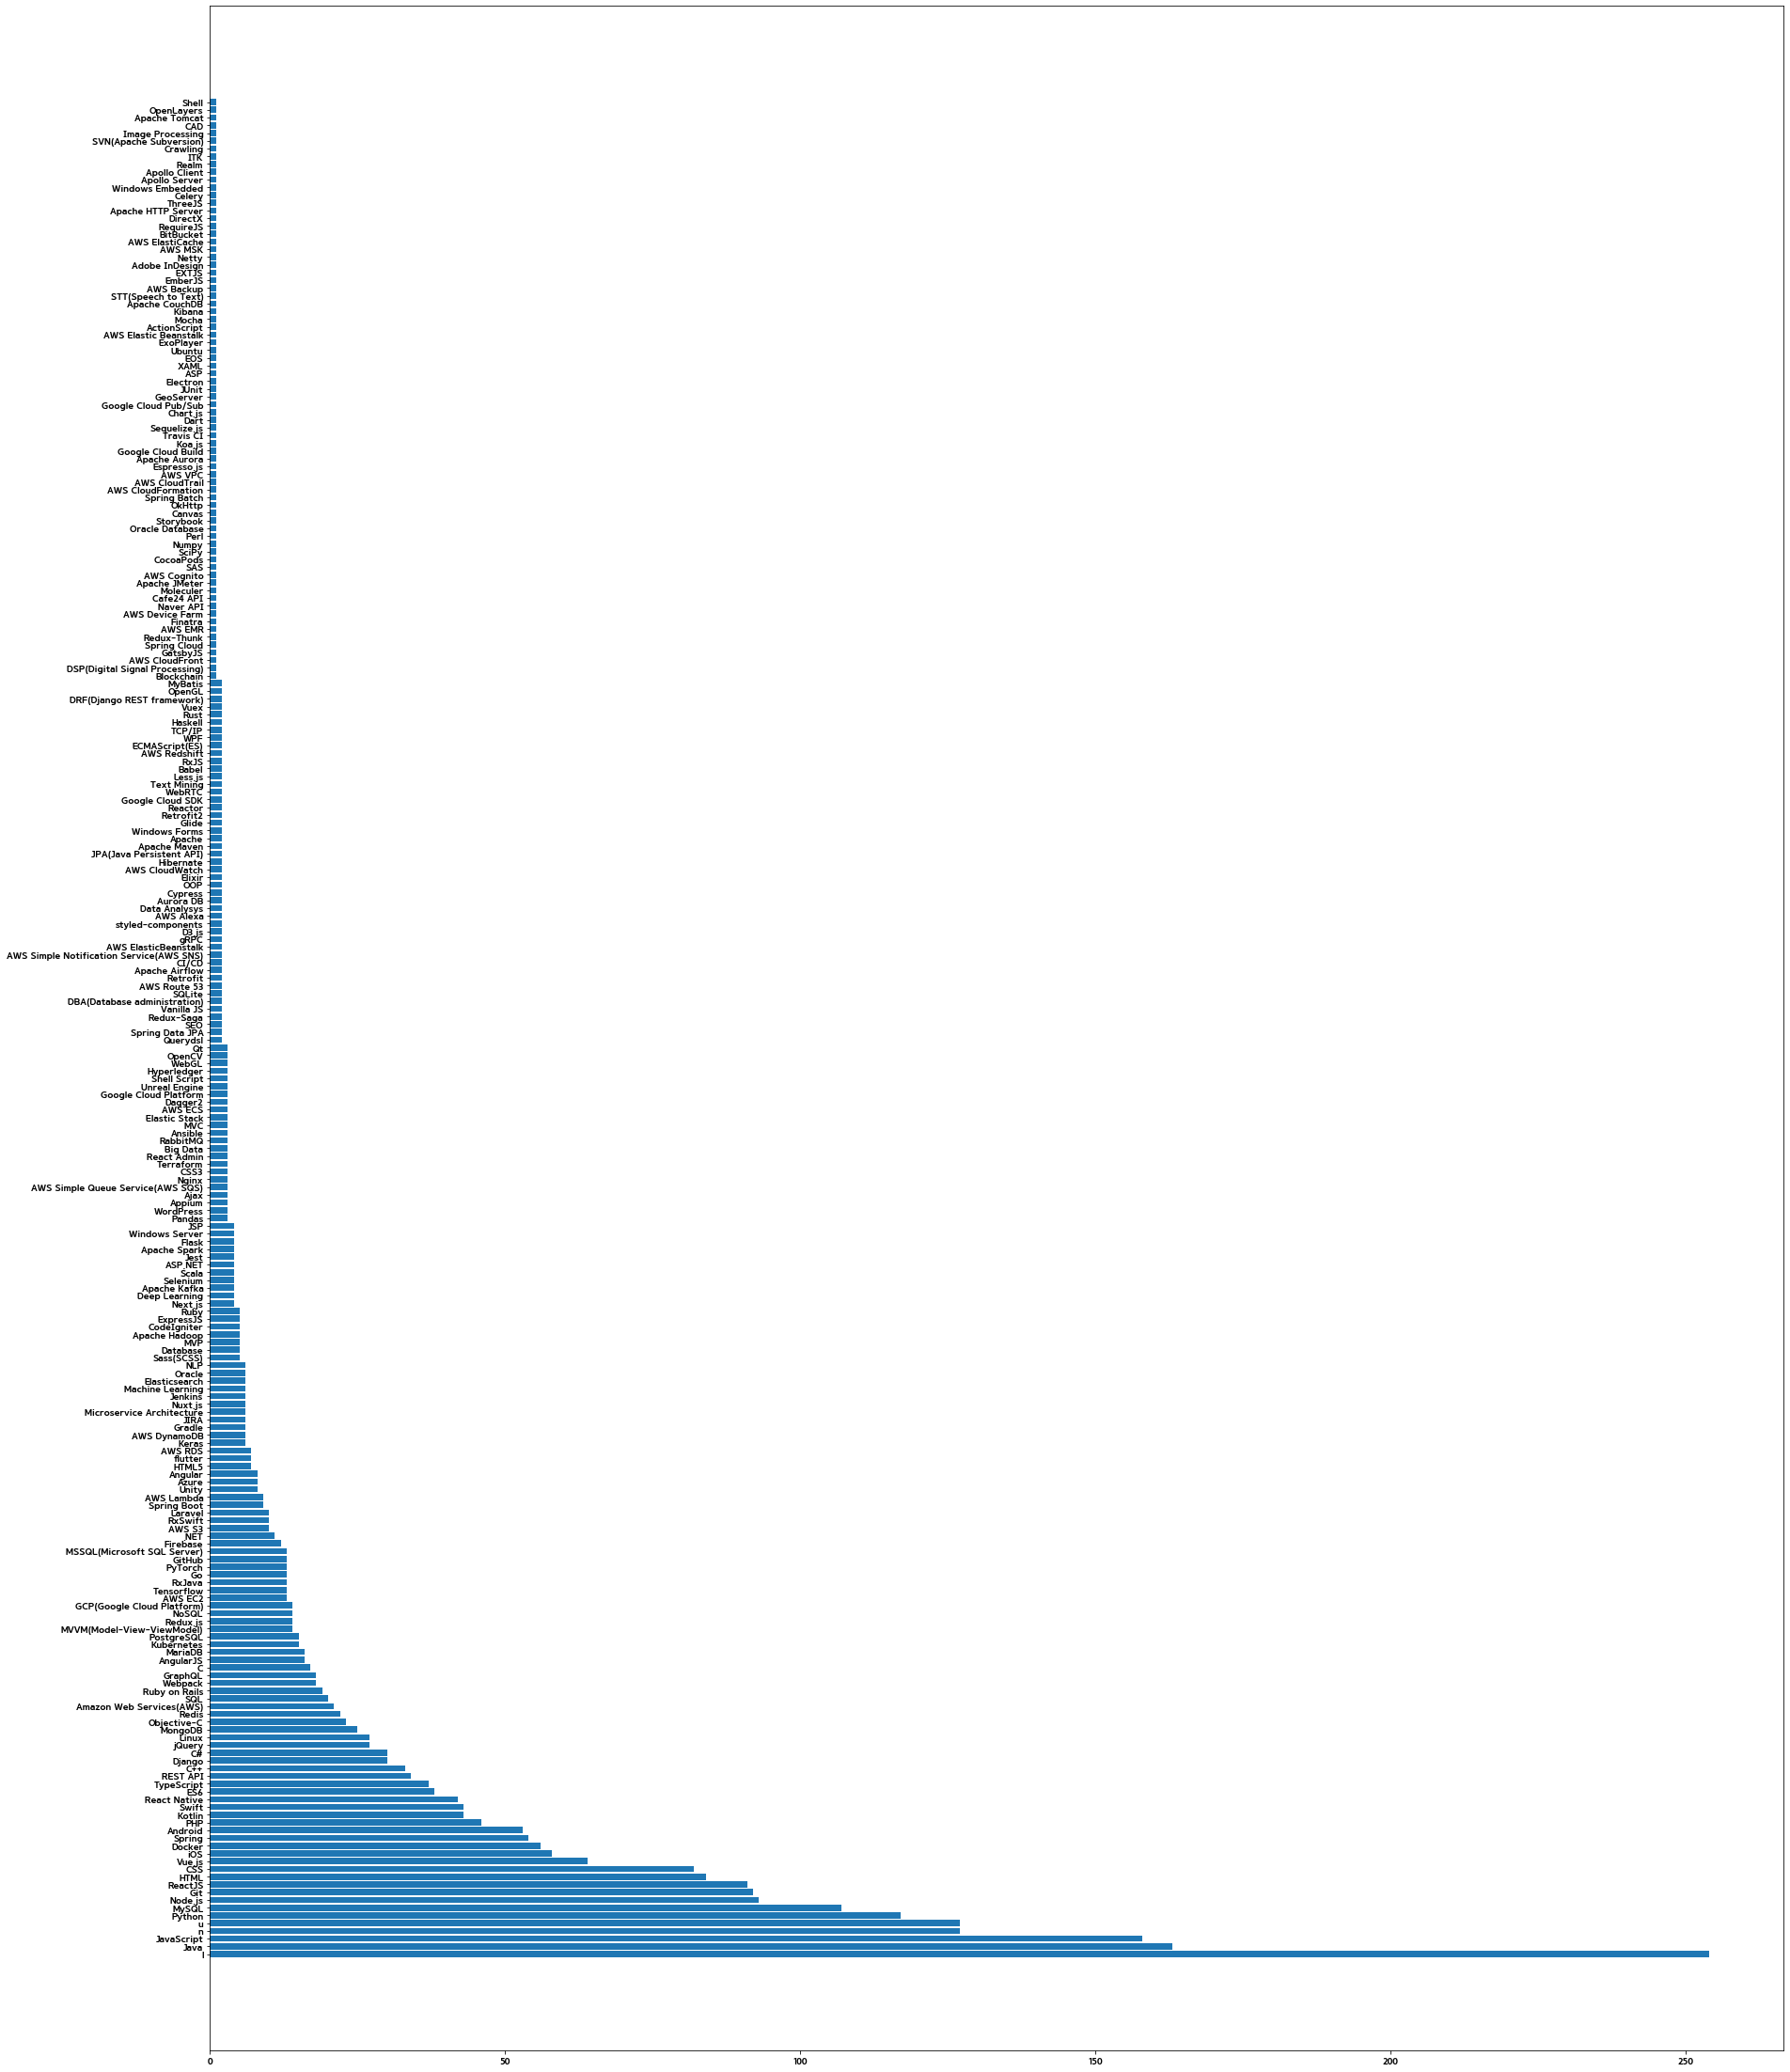

240 ['l', 'Java', 'JavaScript', 'n', 'u', 'Python', 'MySQL', 'Node.js', 'Git', 'ReactJS', 'HTML', 'CSS', 'Vue.js', 'iOS', 'Docker', 'Spring', 'Android', 'PHP', 'Kotlin', 'Swift', 'React Native', 'ES6', 'TypeScript', 'REST API', 'C++', 'Django', 'C#', 'jQuery', 'Linux', 'MongoDB', 'Objective-C', 'Redis', 'Amazon Web Services(AWS)', 'SQL', 'Ruby on Rails', 'Webpack', 'GraphQL', 'C', 'AngularJS', 'MariaDB', 'Kubernetes', 'PostgreSQL', 'MVVM(Model-View-ViewModel)', 'Redux.js', 'NoSQL', 'GCP(Google Cloud Platform)', 'AWS EC2', 'Tensorflow', 'RxJava', 'Go', 'PyTorch', 'GitHub', 'MSSQL(Microsoft SQL Server)', 'Firebase', '.NET', 'AWS S3', 'RxSwift', 'Laravel', 'Spring Boot', 'AWS Lambda', 'Unity', 'Azure', 'Angular', 'HTML5', 'flutter', 'AWS RDS', 'Keras', 'AWS DynamoDB', 'Gradle', 'JIRA', 'Microservice Architecture', 'Nuxt.js', 'Jenkins', 'Machine Learning', 'Elasticsearch', 'Oracle', 'NLP', 'Sass(SCSS)', 'Database', 'MVP', 'Apache Hadoop', 'CodeIgniter', 'ExpressJS', 'Ruby', 'Next.js', 'Dee

In [69]:
#데이터 분석하기
#1.기술스택에 대한 수요 조사
stack_list_fw = []
stack_list_x = []
stack_num_list = []

for stack in hire_info_data['stack']:
    try:
        stack_list_fw += stack
    except:
        pass
for stack in stack_list_fw:
    if stack not in stack_list_x:
        stack_list_x.append(stack)

for stack in stack_list_x:
    stack_num = stack_list_fw.count(stack)
    stack_num_list.append(stack_num)
    
stack_dict = dict(zip(stack_list_x,stack_num_list))

sorted_stack_dict = sorted(stack_dict.items(), key=lambda x: x[1], reverse=True)

sorted_stack_list =[]
sorted_stack_num_list = []

for stack_info in sorted_stack_dict:
    sorted_stack_list.append(stack_info[0])
    sorted_stack_num_list.append(stack_info[1])
    
sorted_stack_dict  = dict(zip(sorted_stack_list, sorted_stack_num_list))

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 40))
plt.barh(sorted_stack_list,sorted_stack_num_list)

fig = plt.gcf()

plt.show()

fig.savefig('stack_analy.png')

print(len(sorted_stack_list), sorted_stack_list, sorted_stack_num_list)

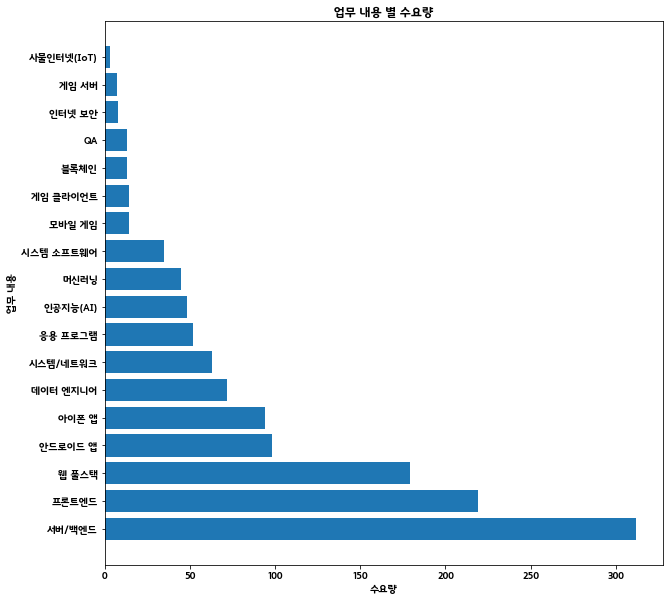

['서버/백엔드', '프론트엔드', '웹 풀스택', '안드로이드 앱', '아이폰 앱', '데이터 엔지니어', '시스템/네트워크', '응용 프로그램', '인공지능(AI)', '머신러닝', '시스템 소프트웨어', '모바일 게임', '게임 클라이언트', '블록체인', 'QA', '인터넷 보안', '게임 서버', '사물인터넷(IoT)']


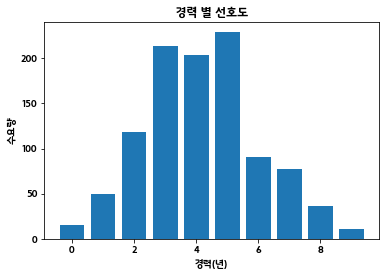

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9] [15, 50, 118, 213, 203, 229, 91, 77, 37, 11]


In [80]:
#2.회사의 summury 분석

company_task_an = []#모든 스택 모으기
all_company_task = []#스택 개수 세기 위한 리스트
all_company_task_dupx = []#스택 중복X 
company_task_list = []#회사별 필요한 스택 묶어서 보기
task_num_list=[]#스택별 개수 

#경력사항 분석 자료형
career = []
career_num = []
all_c = []
all_c_num = []

for i in hire_info_data['company_summary']:
    company_task = []
    try:
        company_task.append(i['직무'])
        company_task_an.append(i['직무'])
        company_task_list.append(company_task)
        career.append(i['경력'])
    except:
        pass
    
#2-1 업무 분석
for i in company_task_an:
    a = i.split(',')
    for k in a:
         k = k.strip()
         all_company_task.append(k)
    
for i in all_company_task:
    if i not in all_company_task_dupx:
        all_company_task_dupx.append(i)

for i in all_company_task_dupx:
    task_num = all_company_task.count(i)
    task_num_list.append(task_num)
    
company_task_dict = dict(zip(all_company_task_dupx, task_num_list))
                         
sorted_task = sorted(company_task_dict.items(), key=lambda x: x[1], reverse=True)                         

sorted_task_list = []
sorted_task_num_list = []

for i in sorted_task:
    sorted_task_list.append(i[0])
    sorted_task_num_list.append(i[1])
    
plt.figure(figsize = (10,10)) 

ax = plt.subplot(1, 1, 1)

plt.title('업무 내용 별 수요량')

plt.barh(sorted_task_list, sorted_task_num_list)

plt.xlabel('수요량')
plt.ylabel('업무 내용')
    
fig = plt.gcf()

plt.show()

fig.savefig('task_analy.png')

print(sorted_task_list)

#2-2경력 분석
for i in range(len(career)):
    if career[i] != '경력 무관':
        if career[i] =='신입':
            career[i] = 0
            career_num.append(0)
        else:
            min_career = int(career[i][0])
            max_career = int(career[i][-2])
            for k in range(min_career, max_career+1):
                career_num.append(k) 

for i in career_num:
    if i not in all_c:
        all_c.append(i)
        all_c = sorted(all_c)
        
for i in all_c:
    a = career_num.count(i)
    all_c_num.append(a)

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='C:/Users/unist/Downloads/godoFont/godoFont/GodoB.ttf').get_name()
rc('font', family=font_name)

fig = plt.figure()
ax = plt.subplot(1, 1, 1)

plt.title('경력 별 선호도')
ax.bar(all_c, all_c_num)

plt.xlabel('경력(년)')
plt.ylabel('수요량')

fig2 = plt.gcf()

plt.show()

fig2.savefig('career.png')

print(all_c, all_c_num)

In [50]:
#3.회사의 requirement(자격조건)분석
from konlpy.tag import *
from konlpy.corpus import kolaw
import nltk

okt = Okt()

#빈 자료형 만들기
req_l = []
pref_l = []
des_l = []
cul_l = []

for i in range(len(hire_info_data)):
    hi_info = hire_info_data.iloc[i]
    company_requirement = okt.nouns(hire_info_data['requirement'][i])
    if company_requirement != ['null']:
        req_l+=company_requirement
    else: 
        pass

    #5.회사의 preference 우대조건 분석

    company_preference = okt.phrases(hire_info_data['preference'][i])
    if company_preference != ['null']:
        pref_l += company_preference
    else:
        pass

    #6.회사의 description 분석

    company_description = okt.phrases(hire_info_data['description'][i])
    if  company_description != ['null']:
        des_l += company_description
    else:
        pass

    #7.회사의 culture 분석

    company_culture = okt.phrases(hire_info_data['culture'][i])
    if company_culture!= ['null']:
        cul_l +=company_culture
    else:
        pass

In [51]:
#자료형 설정
dupx_req_l = []
dupx_req_num_l=[]

for i in req_l:
    if i not in dupx_req_l:
        dupx_req_l.append(i)

for i in dupx_req_l:
    a = cul_l.count(i)
    dupx_req_num_l.append(a)

    
req_dict = dict(zip(dupx_req_l,dupx_req_num_l))
                         
sorted_req = sorted(req_dict.items(), key=lambda x: x[1], reverse=True)                         

sorted_req_list = []
sorted_req_num_list = []

for i in sorted_req:
    sorted_req_list.append(i[0])
    sorted_req_num_list.append(i[1])
    
print(sorted_req)

[('개발', 226), ('환경', 226), ('개발자', 195), ('관리', 194), ('버전', 188), ('프로젝트', 187), ('코드', 133), ('리뷰', 133), ('기술', 116), ('스택', 116), ('이상', 56), ('진행', 17), ('통해', 13), ('서버', 9), ('배포', 9), ('서비스', 8), ('요청', 8), ('모든', 8), ('작업', 7), ('사용', 7), ('테스트', 7), ('경우', 7), ('코딩', 7), ('부분', 6), ('이슈', 6), ('주로', 6), ('이용', 5), ('사내', 5), ('참고', 5), ('전체', 5), ('확인', 4), ('화면', 4), ('동료', 3), ('정도', 3), ('사항', 3), ('과정', 3), ('리팩토링', 3), ('업무', 3), ('구성', 3), ('다른', 3), ('방식', 3), ('로직', 3), ('추가', 3), ('수정', 3), ('숙련', 3), ('수행', 3), ('온라인', 3), ('직접', 3), ('이후', 3), ('완료', 3), ('다시', 3), ('컨벤션', 3), ('검증', 3), ('작성', 2), ('관련', 2), ('담당', 2), ('모두', 2), ('때문', 2), ('해외', 2), ('문제', 2), ('마련', 2), ('협업', 2), ('비즈니스', 2), ('단위', 2), ('가지', 2), ('자체', 2), ('프론트', 2), ('발생', 2), ('현재', 2), ('동작', 2), ('스팅', 2), ('적용', 2), ('포함', 2), ('상태', 2), ('최소한', 2), ('저희', 2), ('최종', 2), ('다음', 2), ('확률', 2), ('처리', 1), ('대한', 1), ('지식', 1), ('성능', 1), ('데이터', 1), ('최적화', 1), ('설계', 1), ('수집', 1), ('내용

In [52]:
#자료형 설정
dupx_pref_l = []
dupx_pref_num_l=[]

for i in pref_l:
    if i not in dupx_pref_l:
        dupx_pref_l.append(i)

for i in dupx_pref_l:
    a = pref_l.count(i)
    dupx_pref_num_l.append(a)

print(dupx_pref_l)

['Engineer', 'Engineer or', 'Engineer or equivalent', 'Engineer or equivalent technical', 'or', 'equivalent', 'technical', 'field', 'experience', 'Eco', 'friendly', 'mind', 'ORM', '대한', '대한 이해', '있으신 분', '있으신 분 Entity', '있으신 분 Entity Framework', '있으신 분 Entity Framework JPA', '있으신 분 Entity Framework JPA 대규모', '있으신 분 Entity Framework JPA 대규모 서비스', '있으신 분 Entity Framework JPA 대규모 서비스 DB', 'DB', 'DB 관련', 'DB 관련 라이센스', 'DB 관련 라이센스 보유자', 'DB 관련 라이센스 보유자 Big', 'DB 관련 라이센스 보유자 Big Data', 'DB 관련 라이센스 보유자 Big Data 분석', 'DB 관련 라이센스 보유자 Big Data 분석 및', '이해', 'Entity', 'Framework', 'JPA', '대규모', '서비스', '운영', '경험자', '관련', '라이센스', '보유자', 'Big', 'Data', '분석', '실무', '경험', 'hadoop', 'Spark', 'Hive', 'Oozie', 'Kafka', 'Hadoop', 'Analytics', 'AWS', 'AWS Cloud', 'AWS Cloud 관련', 'AWS Cloud 관련 경험', 'AWS Cloud 관련 경험 및', 'AWS Cloud 관련 경험 및 자격증', 'AWS Cloud 관련 경험 및 자격증 보유', 'AWS Cloud 관련 경험 및 자격증 보유 aws', 'Cloud', '자격증', '보유', 'aws', 'emr', 'athena', 'data', '처리', 'Apache', 'kafka', 'kinesis', 'stream', 'zeppel

In [53]:
#자료형 설정
dupx_des_l = []
dupx_des_num_l=[]

for i in des_l:
    if i not in dupx_des_l:
        dupx_des_l.append(i)

for i in dupx_des_l:
    a = des_l.count(i)
    dupx_des_num_l.append(a)

print(dupx_cul_l)

['개발', '개발 팀', '개발 팀 환경', '개발 팀 환경 팀내', '개발 팀 환경 팀내 개발자', '개발 팀 환경 팀내 개발자 10명', '개발 팀 환경 팀내 개발자 10명 버전관리', '개발 팀 환경 팀내 개발자 10명 버전관리 git', '리뷰', '승인', '후 merge', '후 merge complete', '후 merge complete PR', '후 merge complete PR Pull', '후 merge complete PR Pull Request', '후 merge complete PR Pull Request 를', '환경', '팀내', '개발자', '10', '버전', '관리', 'git', '기술', '스택', 'Azure', 'Django', 'React', 'Admin', 'Native', 'Python', 'JavaScript', '프로젝트', 'Redmine', 'OS', 'Windows', '코드', 'PR', 'Pull', 'Request', 'merge', 'complete', '개발 팀 환경 버전관리', '개발 팀 환경 버전관리 Github', '개발 팀 환경 버전관리 Github 기술', '개발 팀 환경 버전관리 Github 기술 스택', 'Github', 'DigitalOcean', 'Amazon', 'Web', 'Services', 'AWS', 'Notion', 'MacOS', '개발 팀 환경 팀내 개발자 11명', '개발 팀 환경 팀내 개발자 11명 이상', '개발 팀 환경 팀내 개발자 11명 이상 버전관리', '11', '이상', 'CodeCommit', 'JIRA', 'Bitbucket', 'Docker', 'Jenkins', 'Kibana', 'Nexus', 'Aurora', 'DB', 'MySQL', 'RabbitMQ', 'Elasticsearch', 'Linux', 'EC2', 'ECS', 'RDS', 'Git', 'Java', 'Spring', 'Boot', 'DynamoDB', 'Deep', 'Le

In [54]:
#자료형 설정
dupx_cul_l = []
dupx_cul_num_l=[]

for i in cul_l:
    if i not in dupx_cul_l:
        dupx_cul_l.append(i)

for i in dupx_cul_l:
    a = cul_l.count(i)
    dupx_cul_num_l.append(a)

print(dupx_cul_l)

['개발', '개발 팀', '개발 팀 환경', '개발 팀 환경 팀내', '개발 팀 환경 팀내 개발자', '개발 팀 환경 팀내 개발자 10명', '개발 팀 환경 팀내 개발자 10명 버전관리', '개발 팀 환경 팀내 개발자 10명 버전관리 git', '리뷰', '승인', '후 merge', '후 merge complete', '후 merge complete PR', '후 merge complete PR Pull', '후 merge complete PR Pull Request', '후 merge complete PR Pull Request 를', '환경', '팀내', '개발자', '10', '버전', '관리', 'git', '기술', '스택', 'Azure', 'Django', 'React', 'Admin', 'Native', 'Python', 'JavaScript', '프로젝트', 'Redmine', 'OS', 'Windows', '코드', 'PR', 'Pull', 'Request', 'merge', 'complete', '개발 팀 환경 버전관리', '개발 팀 환경 버전관리 Github', '개발 팀 환경 버전관리 Github 기술', '개발 팀 환경 버전관리 Github 기술 스택', 'Github', 'DigitalOcean', 'Amazon', 'Web', 'Services', 'AWS', 'Notion', 'MacOS', '개발 팀 환경 팀내 개발자 11명', '개발 팀 환경 팀내 개발자 11명 이상', '개발 팀 환경 팀내 개발자 11명 이상 버전관리', '11', '이상', 'CodeCommit', 'JIRA', 'Bitbucket', 'Docker', 'Jenkins', 'Kibana', 'Nexus', 'Aurora', 'DB', 'MySQL', 'RabbitMQ', 'Elasticsearch', 'Linux', 'EC2', 'ECS', 'RDS', 'Git', 'Java', 'Spring', 'Boot', 'DynamoDB', 'Deep', 'Le

In [144]:
#업무와 기술 스택의 연관 관계
com_stack_l = []
com_task_l = []

for i in range(len(hire_info_data)):
    try:
        hi_info = hire_info_data.iloc[i]
        com_stack = hi_info['stack']
        com_task = hi_info['company_summary']['직무'].split(',')
        
        com_task_l = []
        
        for i in com_task:
            a = i.strip()
            com_task_l.append(a)
            

        stack_task_dict[i] = [com_stack, com_task_l]
        
    except:
        pass
    
    
#전역 변수 만들기
for stack in sorted_stack_list:
    globals()[f'{stack}_task_l'] = []
    globals()[f'dupx_{stack}_task_l'] = []
    globals()[f'dupx_{stack}_task_num_l'] = []
    
#스택별 업무들 추가
for i in range(len(stack_task_dict)):
    try:
        if stack_task_dict[i][0] != 'null':
            for stack in stack_task_dict[i][0]:
                globals()[f'{stack}_task_l'] += stack_task_dict[i][1]
    except:
        pass

stack_task_data = []  
    
#스택 별 업무 종류 판별/개수 세기
for stack in sorted_stack_list:
    for task in globals()[f'{stack}_task_l']:
        if task not in globals()[f'dupx_{stack}_task_l']:
            globals()[f'dupx_{stack}_task_l'].append(task)
            
    for task in globals()[f'dupx_{stack}_task_l']:
        a = globals()[f'{stack}_task_l'].count(task)
        globals()[f'dupx_{stack}_task_num_l'].append(a)
        
    globals()[f'{stack}_task_dict'] = dict(zip(globals()[f'dupx_{stack}_task_l'], globals()[f'dupx_{stack}_task_num_l']))                     
    globals()[f'sorted_{stack}_task'] = sorted(globals()[f'{stack}_task_dict'].items(), key=lambda x: x[1], reverse=True)
    
    globals()[f'sorted_{stack}_task_l'] = []
    globals()[f'sorted_{stack}_task_num'] = []
    
    for i in globals()[f'sorted_{stack}_task']:
        globals()[f'sorted_{stack}_task_l'].append(i[0])
        globals()[f'sorted_{stack}_task_num'].append(i[1])
        

    for i in globals()[f'sorted_{stack}_task']:
        globals()[f'{stack}_task_analys'] = dict(zip(globals()[f'sorted_{stack}_task_l'], globals()[f'sorted_{stack}_task_num']))
   
    try:
        print(stack, globals()[f'{stack}_task_analys'])
        stack_task_data.append(globals()[f'{stack}_task_analys'])
        
    except:
        pass
    
stack_task_df = pd.Df(stack_task_data)
stack_task_df.to_pickle('./stack_task.pkl')


Java {'서버/백엔드': 120, ' 웹 풀스택': 47, ' 프론트엔드': 32, '안드로이드 앱': 23, ' 시스템/네트워크': 17, ' 데이터 엔지니어': 16, ' 응용 프로그램': 14, ' 시스템 소프트웨어': 9, ' 아이폰 앱': 9, ' 안드로이드 앱': 9, ' 머신러닝': 8, ' 인공지능(AI)': 6, '프론트엔드': 6, ' 블록체인': 5, '머신러닝': 4, '웹 풀스택': 3, '인공지능(AI)': 3, ' 인터넷 보안': 2, '데이터 엔지니어': 2, ' 모바일 게임': 1, ' QA': 1, ' 게임 서버': 1, 'QA': 1, '시스템/네트워크': 1, ' 사물인터넷(IoT)': 1}
JavaScript {'프론트엔드': 82, ' 웹 풀스택': 68, '서버/백엔드': 62, ' 프론트엔드': 36, ' 시스템/네트워크': 13, ' 시스템 소프트웨어': 11, ' 안드로이드 앱': 8, ' 아이폰 앱': 8, ' 응용 프로그램': 7, ' 인공지능(AI)': 6, ' 머신러닝': 5, '안드로이드 앱': 3, ' 데이터 엔지니어': 3, '아이폰 앱': 3, ' QA': 2, ' 인터넷 보안': 2, '게임 클라이언트': 2, ' 게임 서버': 2, '인공지능(AI)': 2, '웹 풀스택': 1, '시스템/네트워크': 1, '모바일 게임': 1, '블록체인': 1, ' 블록체인': 1, ' 모바일 게임': 1}
Python {'서버/백엔드': 82, ' 웹 풀스택': 26, ' 프론트엔드': 19, ' 데이터 엔지니어': 16, '머신러닝': 15, ' 시스템/네트워크': 15, ' 인공지능(AI)': 14, ' 머신러닝': 12, ' 응용 프로그램': 7, '데이터 엔지니어': 7, ' 시스템 소프트웨어': 6, ' 블록체인': 4, '인공지능(AI)': 3, '웹 풀스택': 3, ' 아이폰 앱': 3, ' 인터넷 보안': 2, 'QA': 2, '프론트엔드': 2, ' 안드로이드 앱': 2, ' QA': 1,

NameError: name 'pd' is not defined

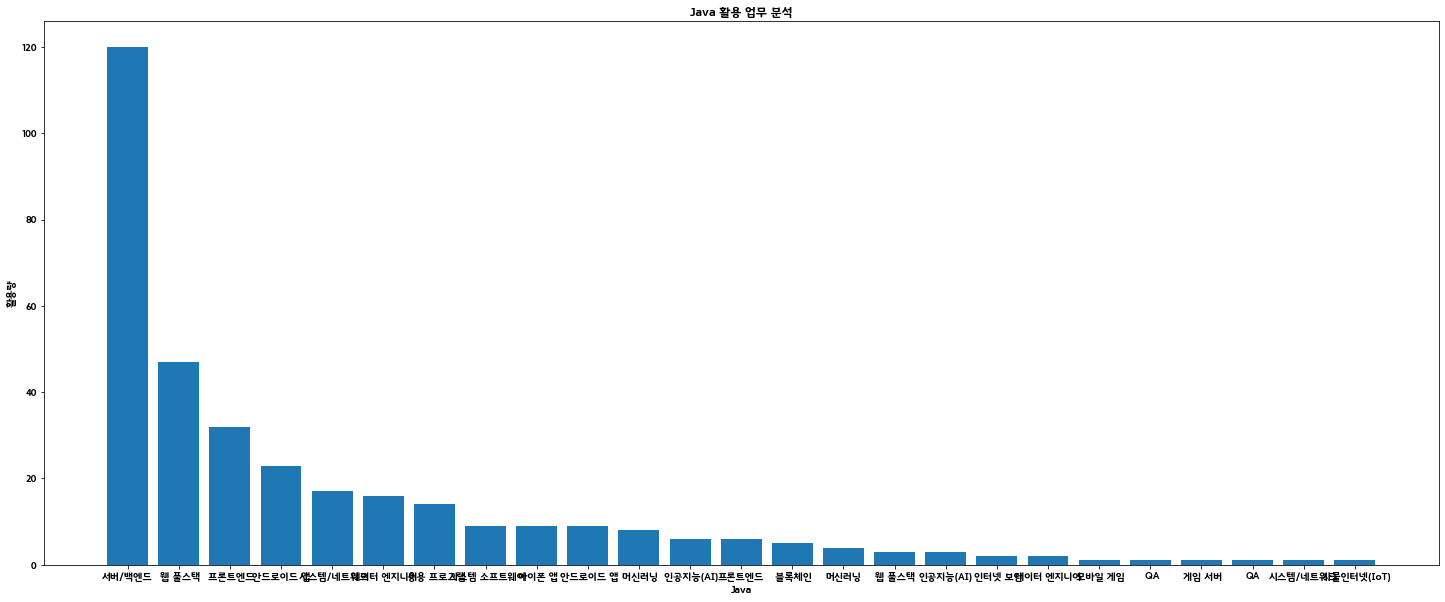

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 프론트엔드', '안드로이드 앱', ' 시스템/네트워크', ' 데이터 엔지니어', ' 응용 프로그램', ' 시스템 소프트웨어', ' 아이폰 앱', ' 안드로이드 앱', ' 머신러닝', ' 인공지능(AI)', '프론트엔드', ' 블록체인', '머신러닝', '웹 풀스택', '인공지능(AI)', ' 인터넷 보안', '데이터 엔지니어', ' 모바일 게임', ' QA', ' 게임 서버', 'QA', '시스템/네트워크', ' 사물인터넷(IoT)']) dict_values([120, 47, 32, 23, 17, 16, 14, 9, 9, 9, 8, 6, 6, 5, 4, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1])


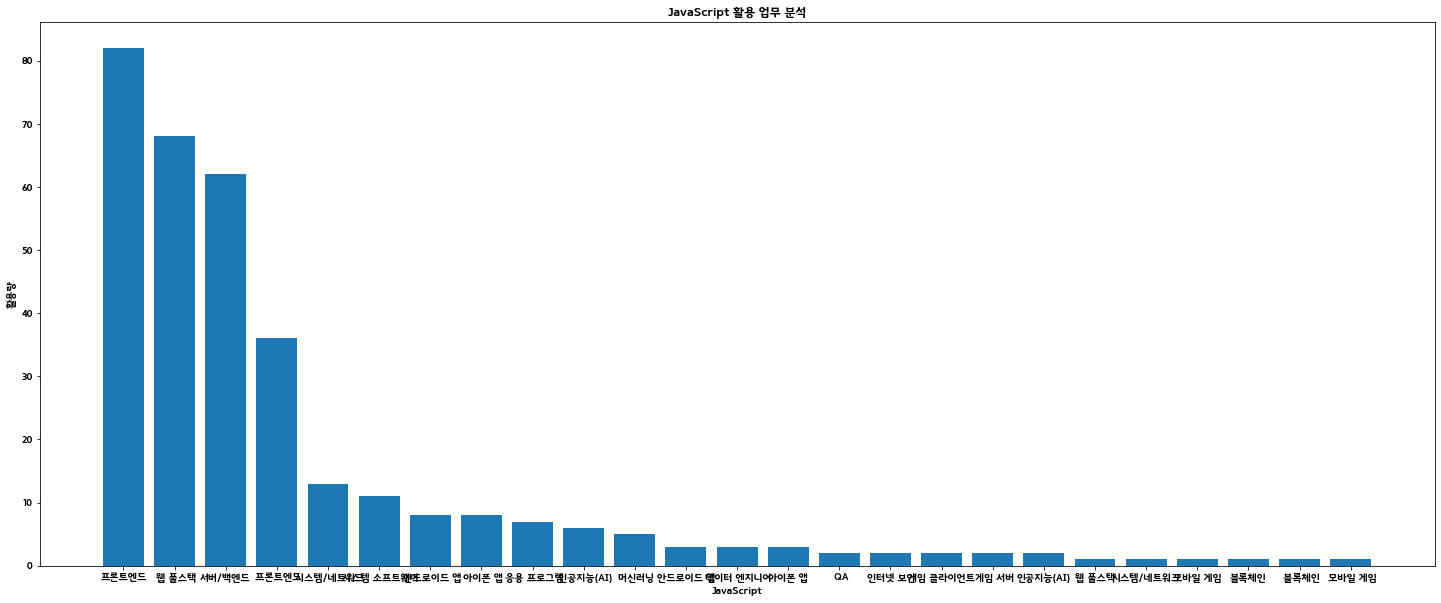

dict_keys(['프론트엔드', ' 웹 풀스택', '서버/백엔드', ' 프론트엔드', ' 시스템/네트워크', ' 시스템 소프트웨어', ' 안드로이드 앱', ' 아이폰 앱', ' 응용 프로그램', ' 인공지능(AI)', ' 머신러닝', '안드로이드 앱', ' 데이터 엔지니어', '아이폰 앱', ' QA', ' 인터넷 보안', '게임 클라이언트', ' 게임 서버', '인공지능(AI)', '웹 풀스택', '시스템/네트워크', '모바일 게임', '블록체인', ' 블록체인', ' 모바일 게임']) dict_values([82, 68, 62, 36, 13, 11, 8, 8, 7, 6, 5, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])


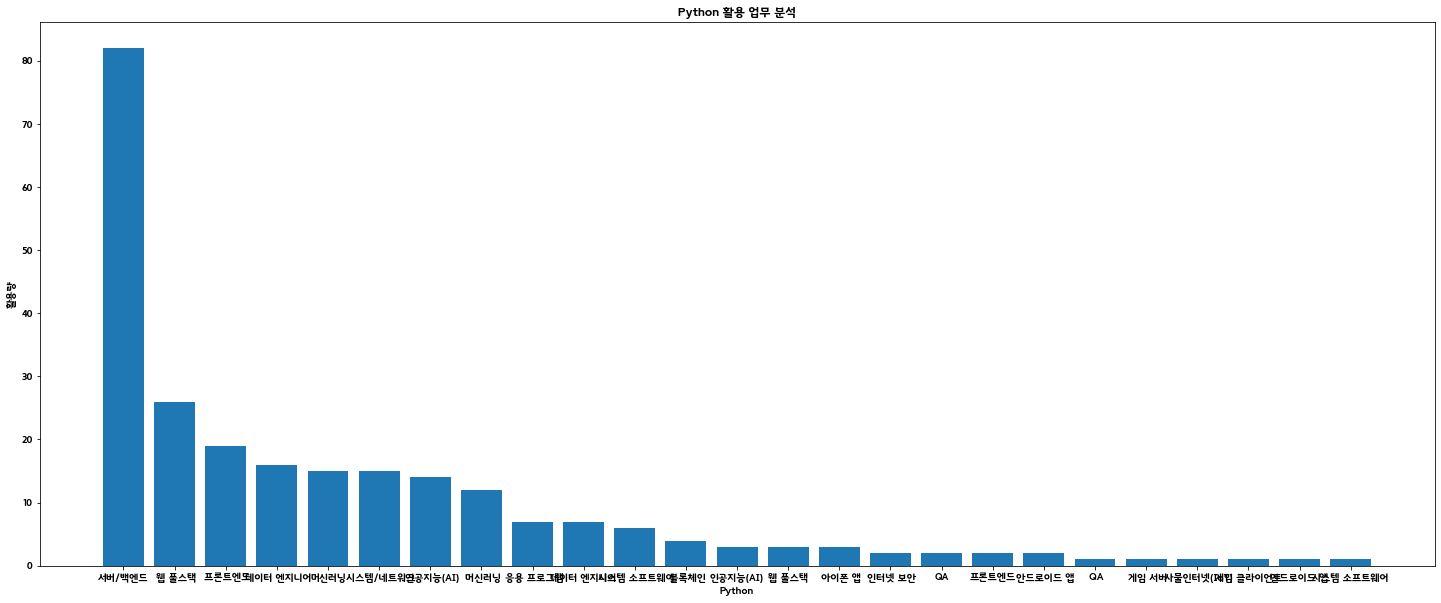

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 프론트엔드', ' 데이터 엔지니어', '머신러닝', ' 시스템/네트워크', ' 인공지능(AI)', ' 머신러닝', ' 응용 프로그램', '데이터 엔지니어', ' 시스템 소프트웨어', ' 블록체인', '인공지능(AI)', '웹 풀스택', ' 아이폰 앱', ' 인터넷 보안', 'QA', '프론트엔드', ' 안드로이드 앱', ' QA', ' 게임 서버', ' 사물인터넷(IoT)', '게임 클라이언트', '안드로이드 앱', '시스템 소프트웨어']) dict_values([82, 26, 19, 16, 15, 15, 14, 12, 7, 7, 6, 4, 3, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])


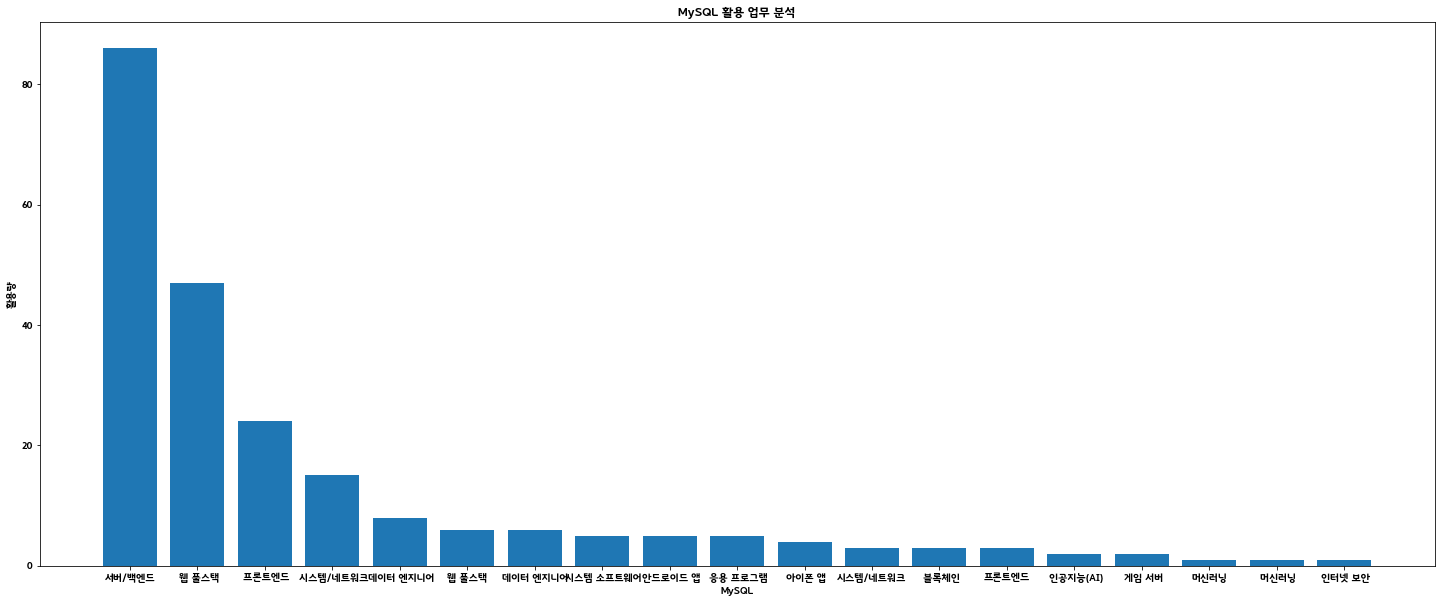

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 프론트엔드', ' 시스템/네트워크', ' 데이터 엔지니어', '웹 풀스택', '데이터 엔지니어', ' 시스템 소프트웨어', ' 안드로이드 앱', ' 응용 프로그램', ' 아이폰 앱', '시스템/네트워크', ' 블록체인', '프론트엔드', ' 인공지능(AI)', ' 게임 서버', '머신러닝', ' 머신러닝', ' 인터넷 보안']) dict_values([86, 47, 24, 15, 8, 6, 6, 5, 5, 5, 4, 3, 3, 3, 2, 2, 1, 1, 1])


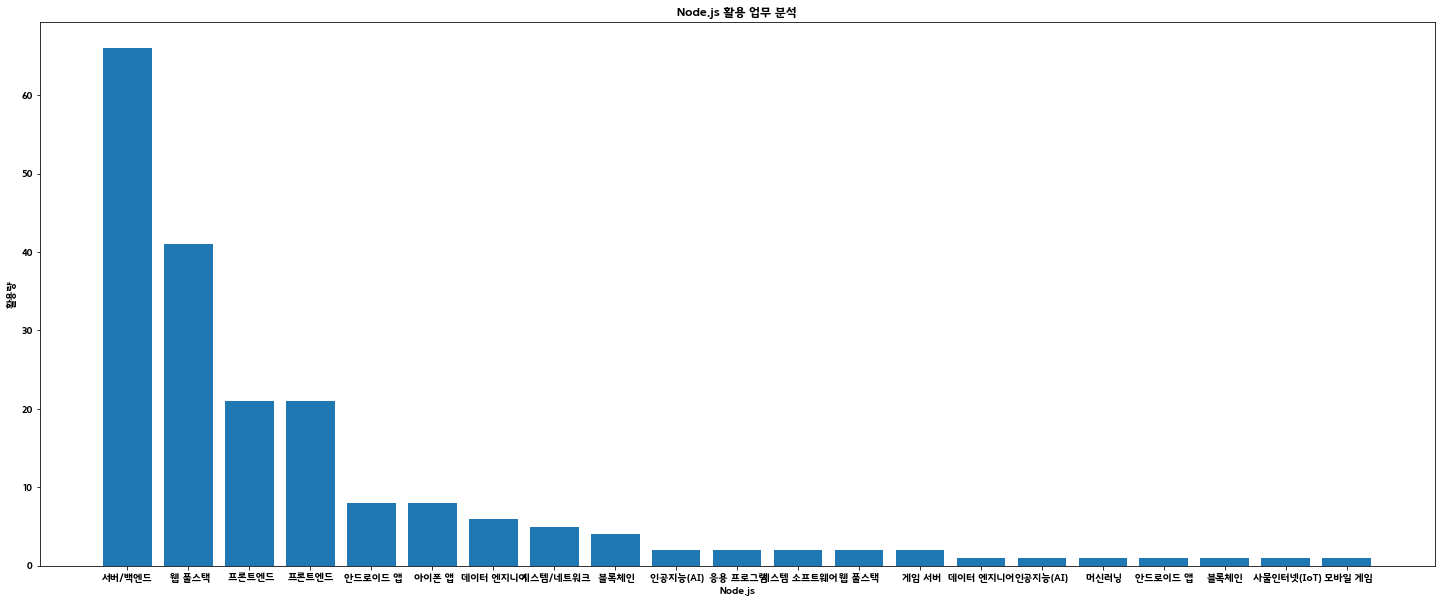

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 프론트엔드', '프론트엔드', ' 안드로이드 앱', ' 아이폰 앱', ' 데이터 엔지니어', ' 시스템/네트워크', ' 블록체인', ' 인공지능(AI)', ' 응용 프로그램', ' 시스템 소프트웨어', '웹 풀스택', ' 게임 서버', '데이터 엔지니어', '인공지능(AI)', ' 머신러닝', '안드로이드 앱', '블록체인', ' 사물인터넷(IoT)', ' 모바일 게임']) dict_values([66, 41, 21, 21, 8, 8, 6, 5, 4, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1])


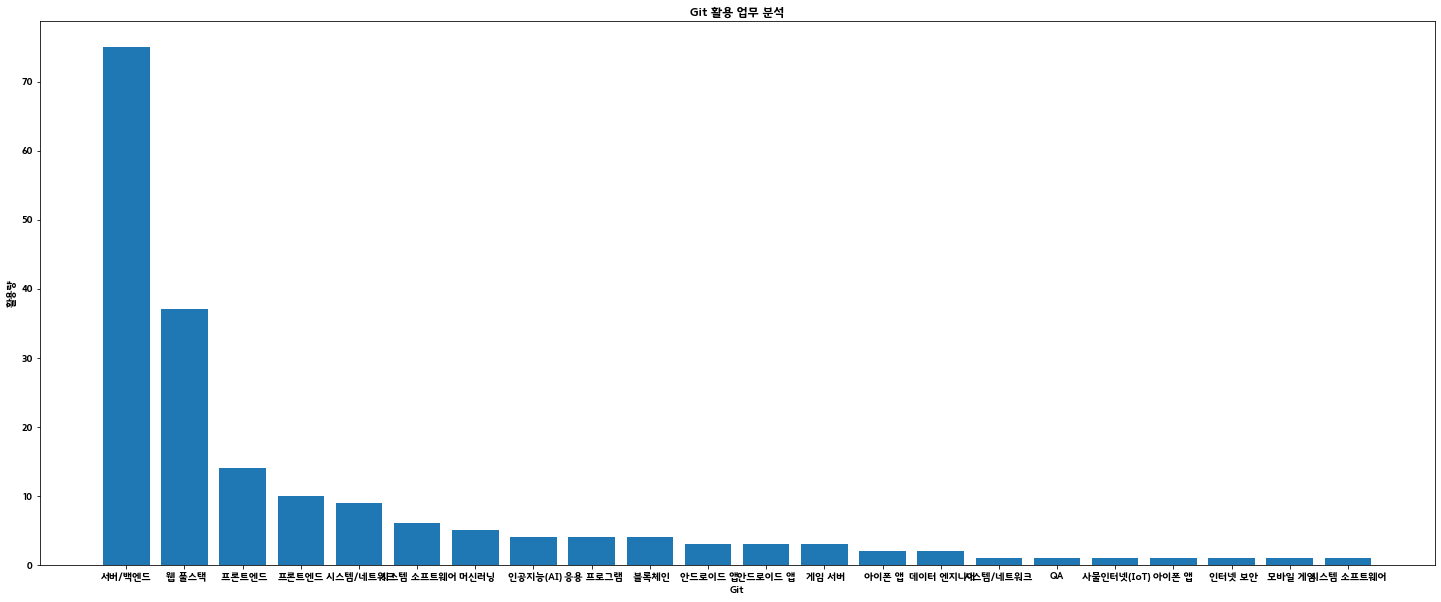

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 프론트엔드', '프론트엔드', ' 시스템/네트워크', ' 시스템 소프트웨어', ' 머신러닝', ' 인공지능(AI)', ' 응용 프로그램', ' 블록체인', ' 안드로이드 앱', '안드로이드 앱', ' 게임 서버', ' 아이폰 앱', ' 데이터 엔지니어', '시스템/네트워크', 'QA', ' 사물인터넷(IoT)', '아이폰 앱', ' 인터넷 보안', ' 모바일 게임', '시스템 소프트웨어']) dict_values([75, 37, 14, 10, 9, 6, 5, 4, 4, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1])


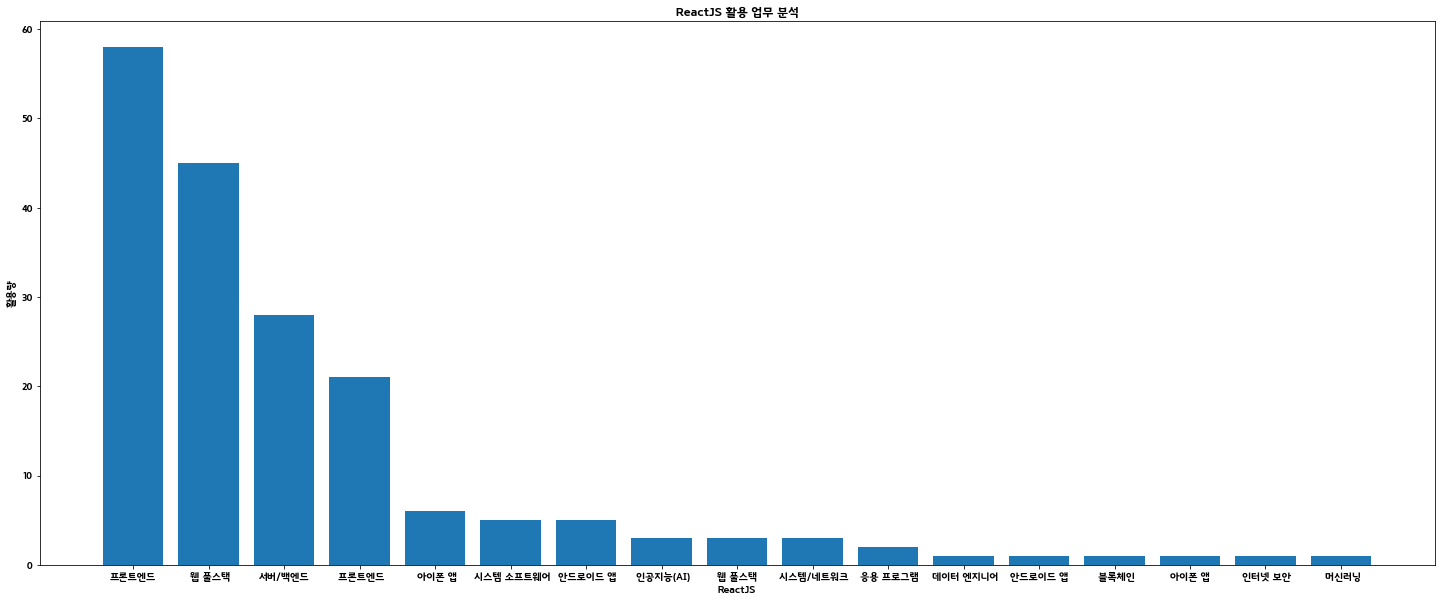

dict_keys(['프론트엔드', ' 웹 풀스택', '서버/백엔드', ' 프론트엔드', ' 아이폰 앱', ' 시스템 소프트웨어', ' 안드로이드 앱', ' 인공지능(AI)', '웹 풀스택', ' 시스템/네트워크', ' 응용 프로그램', ' 데이터 엔지니어', '안드로이드 앱', ' 블록체인', '아이폰 앱', ' 인터넷 보안', ' 머신러닝']) dict_values([58, 45, 28, 21, 6, 5, 5, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1])


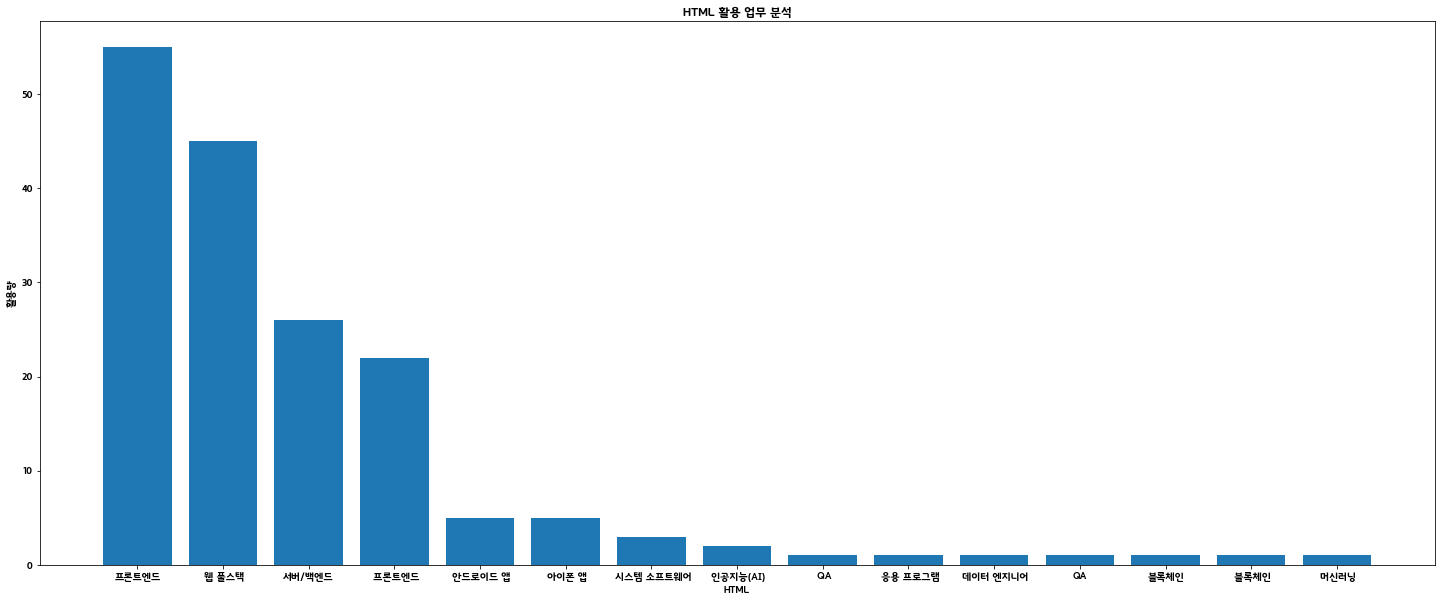

dict_keys(['프론트엔드', ' 웹 풀스택', '서버/백엔드', ' 프론트엔드', ' 안드로이드 앱', ' 아이폰 앱', ' 시스템 소프트웨어', ' 인공지능(AI)', ' QA', ' 응용 프로그램', ' 데이터 엔지니어', 'QA', '블록체인', ' 블록체인', ' 머신러닝']) dict_values([55, 45, 26, 22, 5, 5, 3, 2, 1, 1, 1, 1, 1, 1, 1])


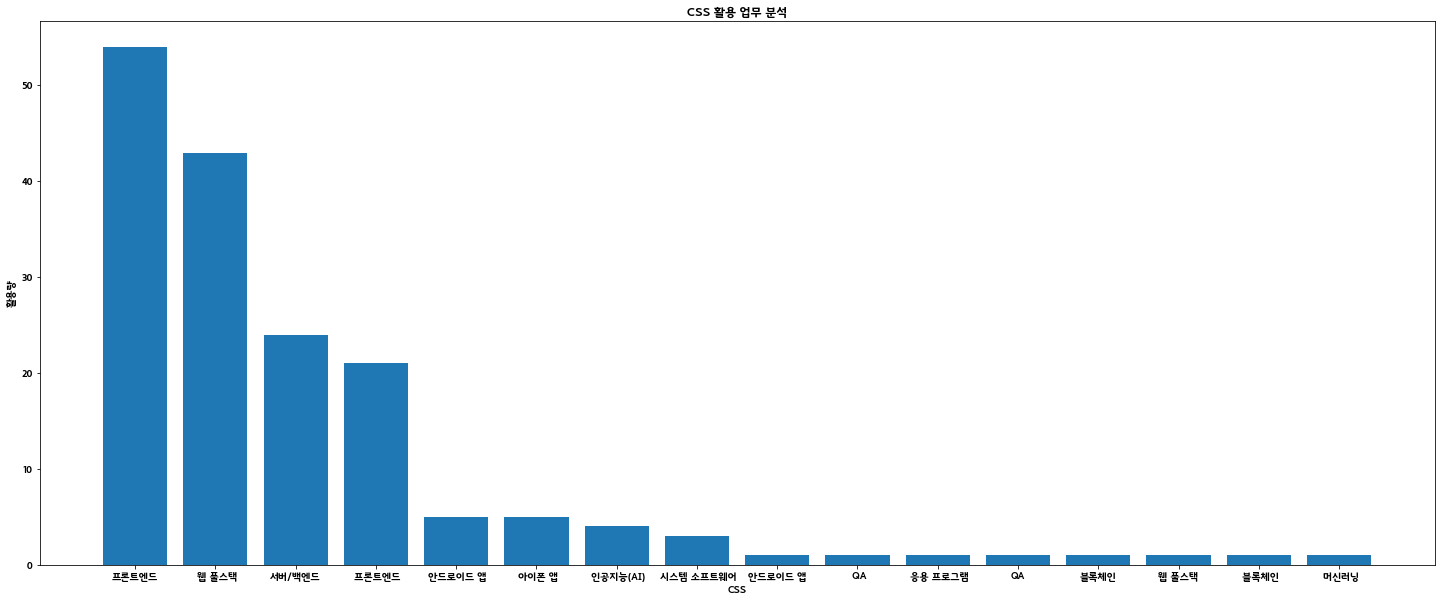

dict_keys(['프론트엔드', ' 웹 풀스택', '서버/백엔드', ' 프론트엔드', ' 안드로이드 앱', ' 아이폰 앱', ' 인공지능(AI)', ' 시스템 소프트웨어', '안드로이드 앱', ' QA', ' 응용 프로그램', 'QA', '블록체인', '웹 풀스택', ' 블록체인', ' 머신러닝']) dict_values([54, 43, 24, 21, 5, 5, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1])


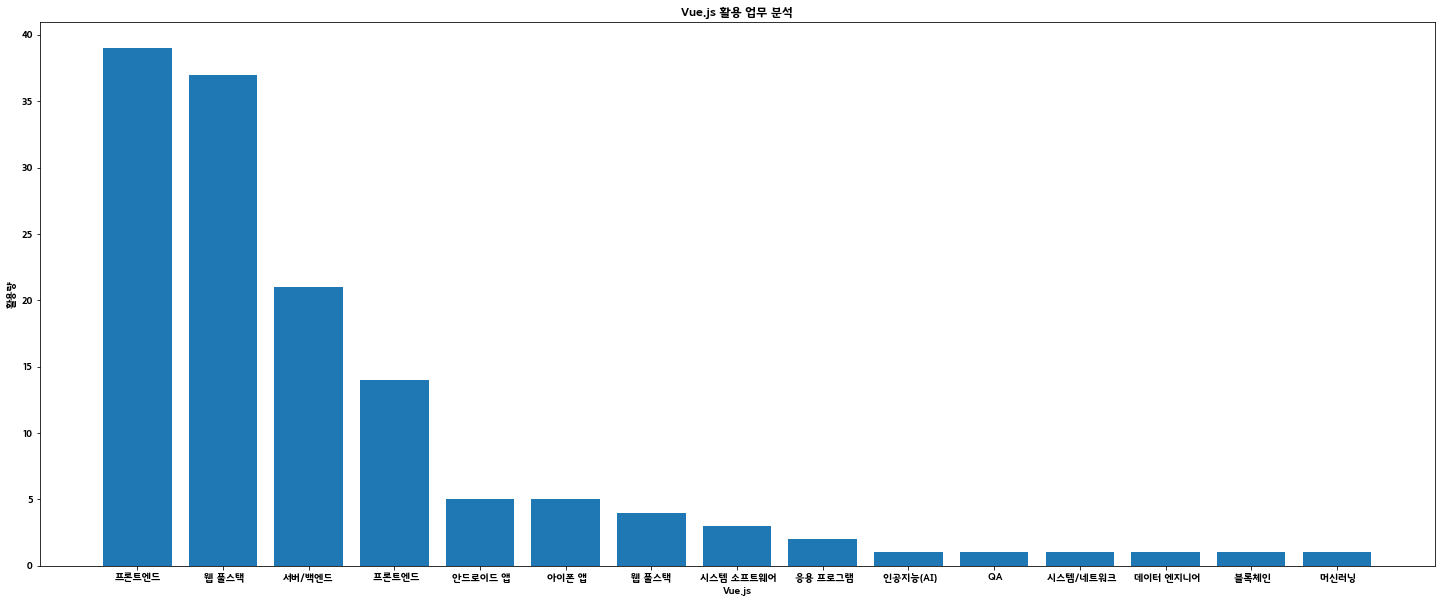

dict_keys(['프론트엔드', ' 웹 풀스택', '서버/백엔드', ' 프론트엔드', ' 안드로이드 앱', ' 아이폰 앱', '웹 풀스택', ' 시스템 소프트웨어', ' 응용 프로그램', ' 인공지능(AI)', ' QA', ' 시스템/네트워크', ' 데이터 엔지니어', ' 블록체인', ' 머신러닝']) dict_values([39, 37, 21, 14, 5, 5, 4, 3, 2, 1, 1, 1, 1, 1, 1])


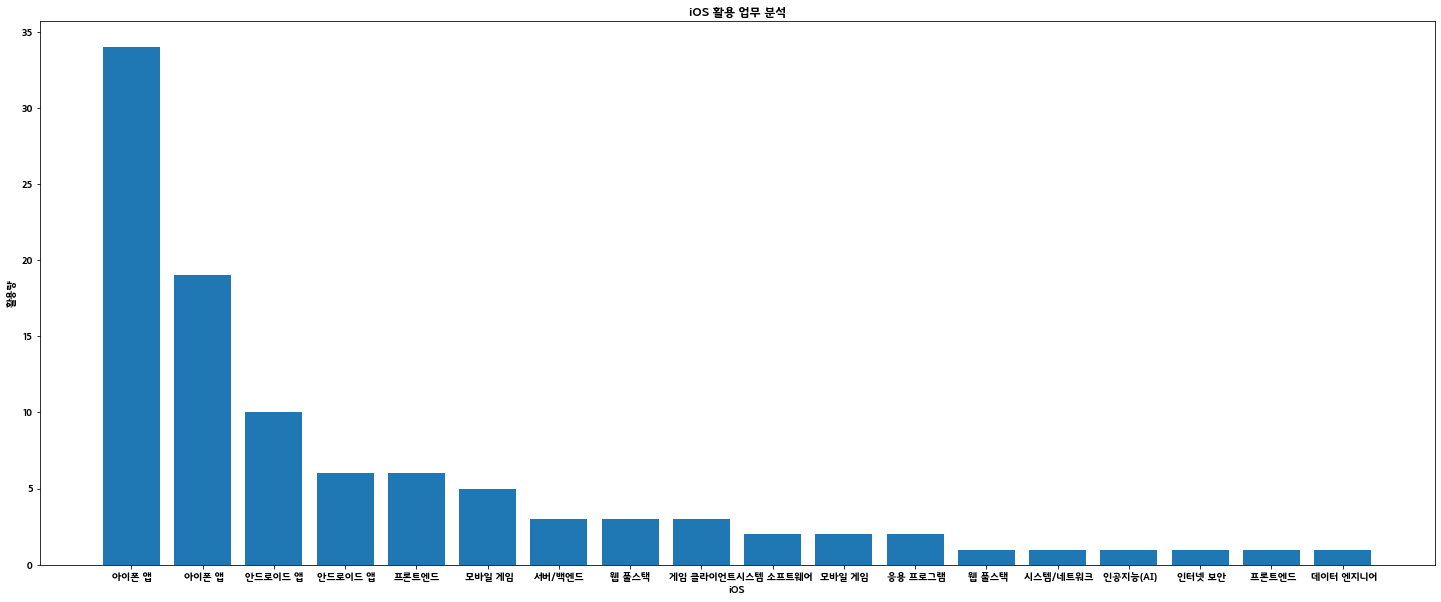

dict_keys(['아이폰 앱', ' 아이폰 앱', '안드로이드 앱', ' 안드로이드 앱', '프론트엔드', ' 모바일 게임', '서버/백엔드', '웹 풀스택', ' 게임 클라이언트', ' 시스템 소프트웨어', '모바일 게임', ' 응용 프로그램', ' 웹 풀스택', ' 시스템/네트워크', ' 인공지능(AI)', ' 인터넷 보안', ' 프론트엔드', ' 데이터 엔지니어']) dict_values([34, 19, 10, 6, 6, 5, 3, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1])


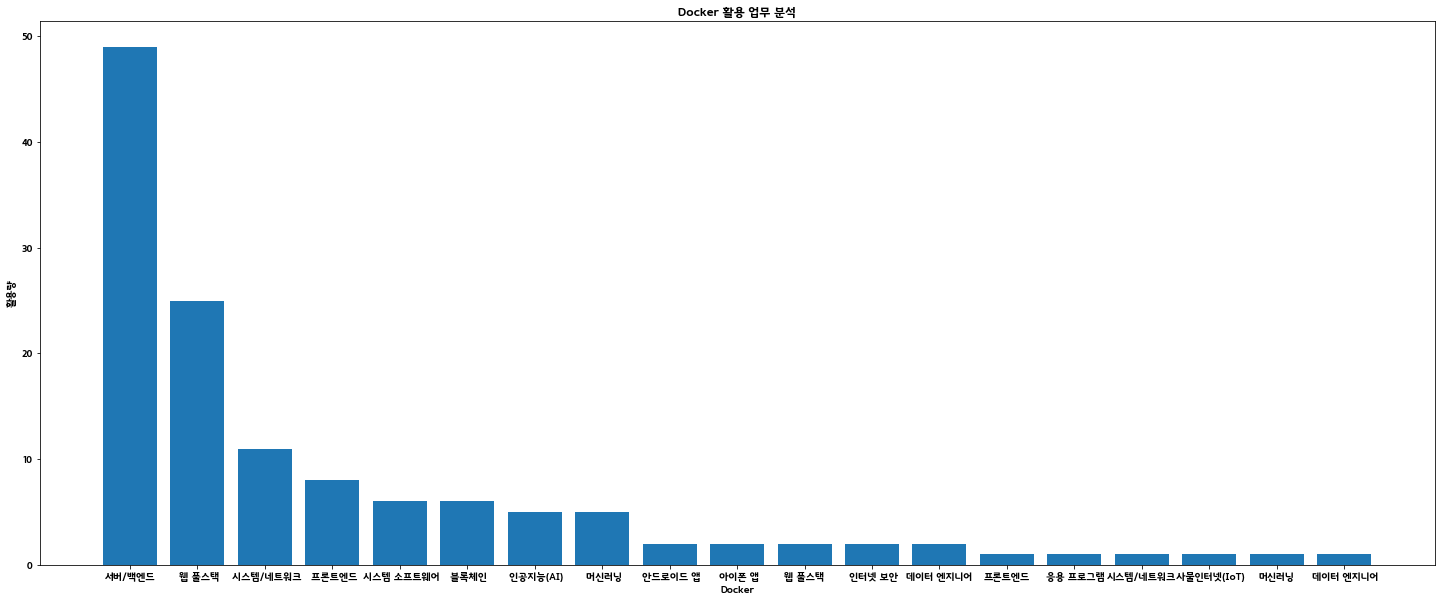

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 시스템/네트워크', ' 프론트엔드', ' 시스템 소프트웨어', ' 블록체인', ' 인공지능(AI)', ' 머신러닝', ' 안드로이드 앱', ' 아이폰 앱', '웹 풀스택', ' 인터넷 보안', '데이터 엔지니어', '프론트엔드', ' 응용 프로그램', '시스템/네트워크', ' 사물인터넷(IoT)', '머신러닝', ' 데이터 엔지니어']) dict_values([49, 25, 11, 8, 6, 6, 5, 5, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])


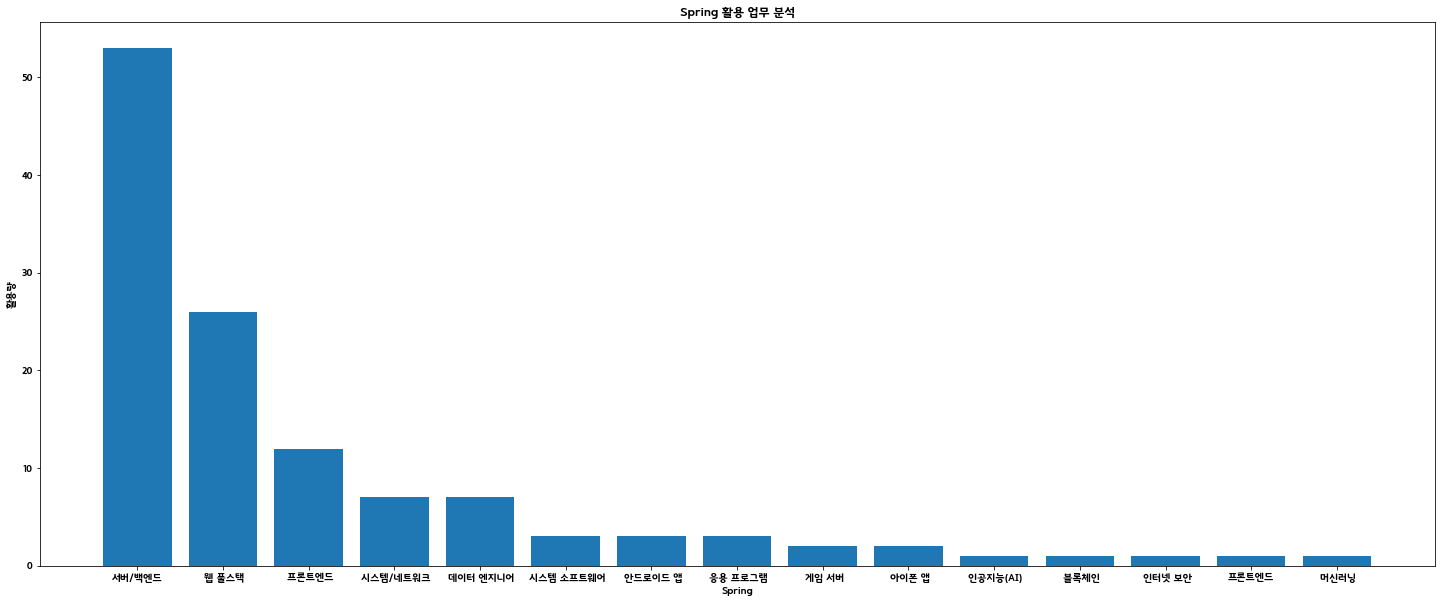

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 프론트엔드', ' 시스템/네트워크', ' 데이터 엔지니어', ' 시스템 소프트웨어', ' 안드로이드 앱', ' 응용 프로그램', ' 게임 서버', ' 아이폰 앱', ' 인공지능(AI)', ' 블록체인', ' 인터넷 보안', '프론트엔드', ' 머신러닝']) dict_values([53, 26, 12, 7, 7, 3, 3, 3, 2, 2, 1, 1, 1, 1, 1])


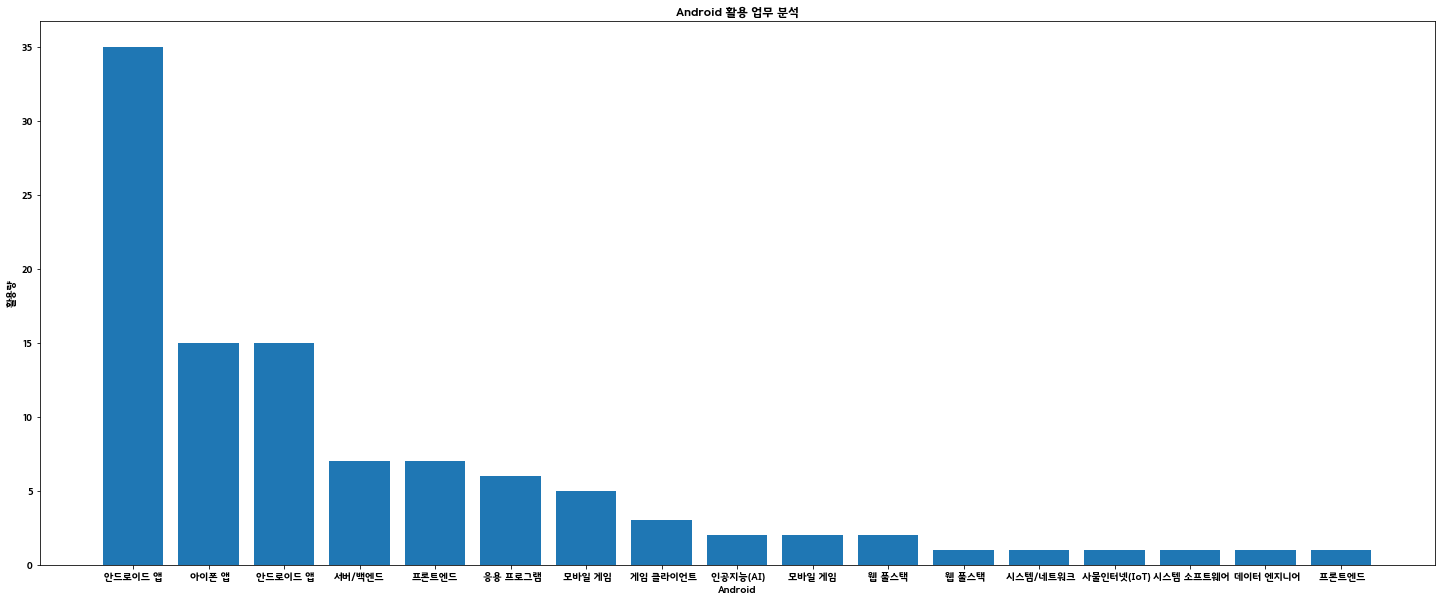

dict_keys(['안드로이드 앱', ' 아이폰 앱', ' 안드로이드 앱', '서버/백엔드', '프론트엔드', ' 응용 프로그램', ' 모바일 게임', ' 게임 클라이언트', ' 인공지능(AI)', '모바일 게임', '웹 풀스택', ' 웹 풀스택', ' 시스템/네트워크', ' 사물인터넷(IoT)', ' 시스템 소프트웨어', ' 데이터 엔지니어', ' 프론트엔드']) dict_values([35, 15, 15, 7, 7, 6, 5, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1])


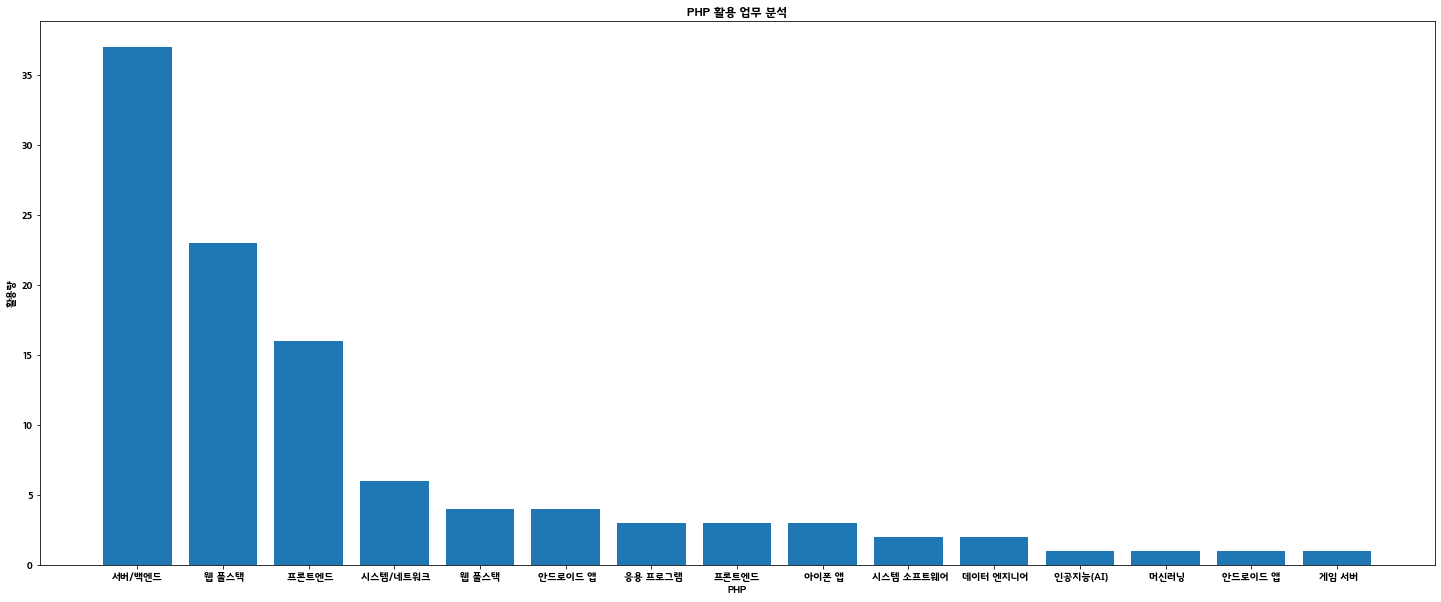

dict_keys(['서버/백엔드', ' 웹 풀스택', ' 프론트엔드', ' 시스템/네트워크', '웹 풀스택', ' 안드로이드 앱', ' 응용 프로그램', '프론트엔드', ' 아이폰 앱', ' 시스템 소프트웨어', ' 데이터 엔지니어', ' 인공지능(AI)', ' 머신러닝', '안드로이드 앱', ' 게임 서버']) dict_values([37, 23, 16, 6, 4, 4, 3, 3, 3, 2, 2, 1, 1, 1, 1])


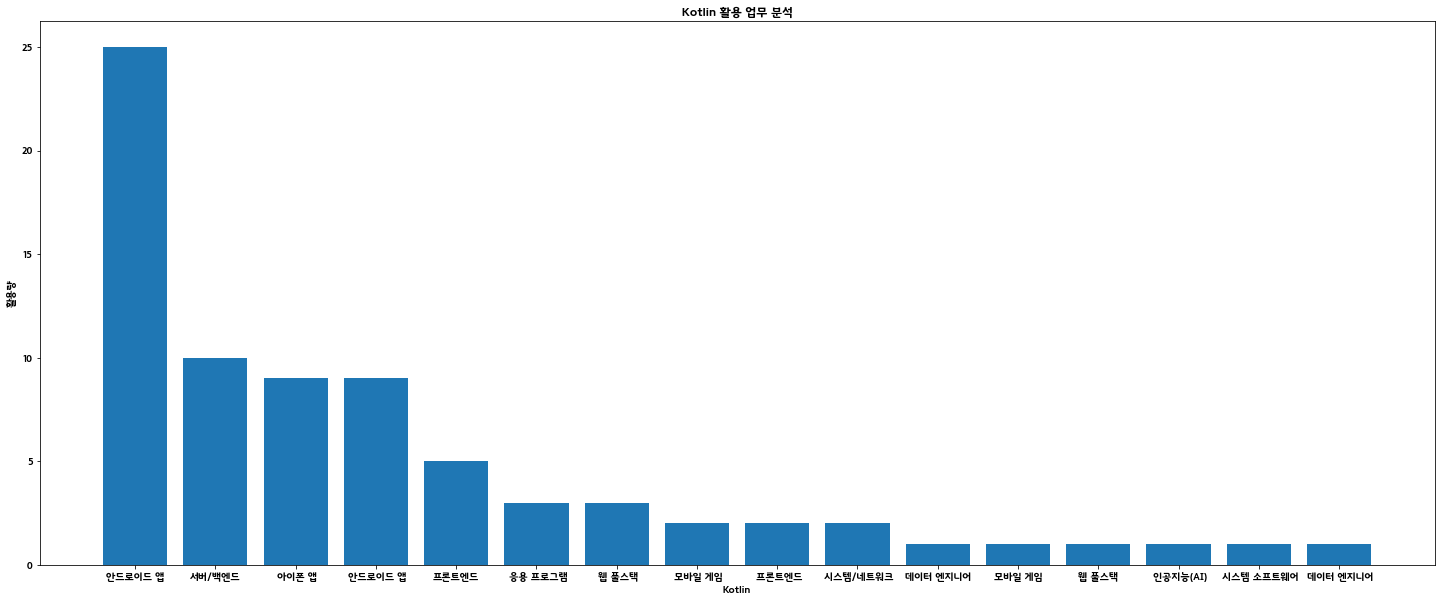

dict_keys(['안드로이드 앱', '서버/백엔드', ' 아이폰 앱', ' 안드로이드 앱', '프론트엔드', ' 응용 프로그램', ' 웹 풀스택', ' 모바일 게임', ' 프론트엔드', ' 시스템/네트워크', '데이터 엔지니어', '모바일 게임', '웹 풀스택', ' 인공지능(AI)', ' 시스템 소프트웨어', ' 데이터 엔지니어']) dict_values([25, 10, 9, 9, 5, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1])


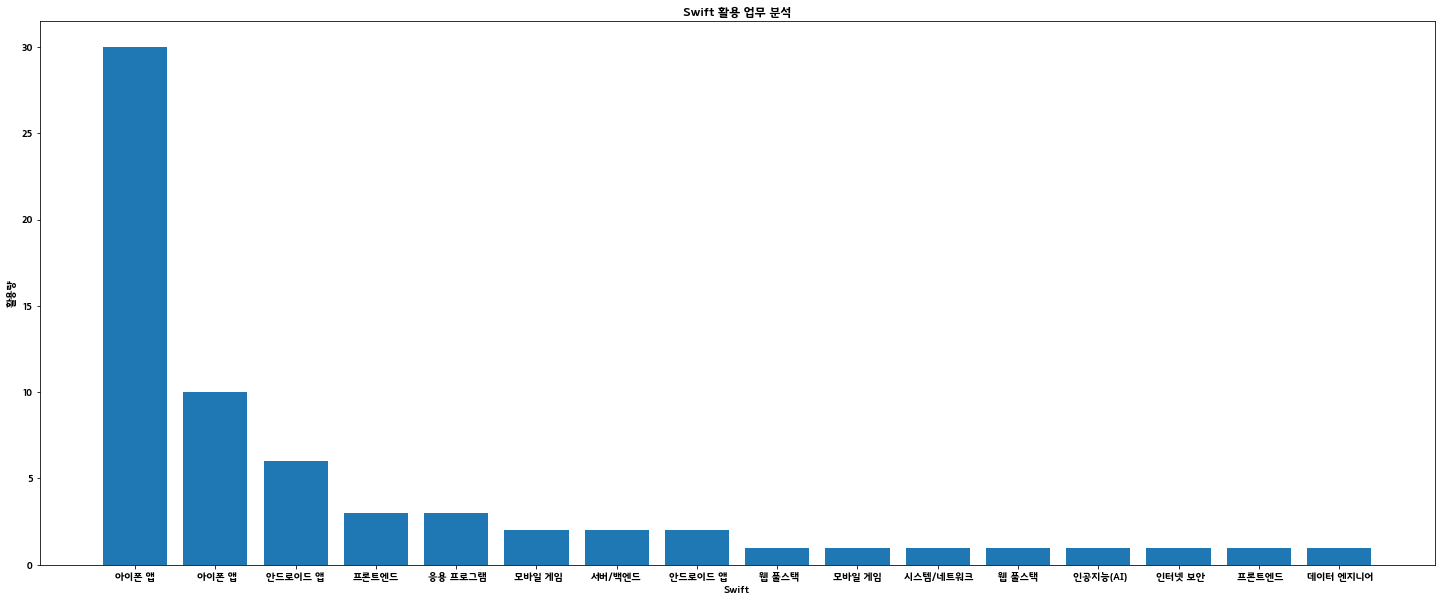

dict_keys(['아이폰 앱', ' 아이폰 앱', '안드로이드 앱', '프론트엔드', ' 응용 프로그램', ' 모바일 게임', '서버/백엔드', ' 안드로이드 앱', ' 웹 풀스택', '모바일 게임', ' 시스템/네트워크', '웹 풀스택', ' 인공지능(AI)', ' 인터넷 보안', ' 프론트엔드', ' 데이터 엔지니어']) dict_values([30, 10, 6, 3, 3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1])


In [146]:
for i in range(20):
    stack = sorted_stack_list[i]
    try:
        a = globals()[f'{stack}_task_analys'].keys()
        b = globals()[f'{stack}_task_analys'].values()
        
        plt.figure(figsize = (25,10)) 

        ax = plt.subplot(1, 1, 1)

        plt.title(f'{stack} 활용 업무 분석')

        plt.bar(a, b)

        plt.xlabel(f'{stack}')
        plt.ylabel('활용량')
    
        fig = plt.gcf()

        plt.show()

        fig.savefig(f'task_{stack}_analy.png')
        
        print(a,b)
        
    except:
        pass
         